In [1]:
## EDA işlemi gerçekleştirmek için gerekli kütüphaneler import edilir ve veri hakkında daha fazla bilgi edinilir.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Tüm satır ve sütunların görünmesi için bir pandas fonksiyonu ayarlanır.
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
# Train verisi içeriye aktarılır/okunur.
train_df_orj = pd.read_csv('/kaggle/input/house-price-prediction-for-ts-students/train2023.csv')

## datanın satır ve sütun yapısını/boyutunu getirelim
print(train_df_orj.shape)

(1042, 81)


In [3]:
# Test verisi içeriye aktarılır/okunur.
test_df_orj = pd.read_csv('/kaggle/input/house-price-prediction-for-ts-students/test2023.csv')

## datanın satır ve sütun yapısını/boyutunu getirelim
print(test_df_orj.shape)

(418, 80)


In [4]:
train_df_orj.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1,1,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1097,1097,GasA,Ex,Y,SBrkr,1097,0,0,1097,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1995.0,Unf,2,672,TA,TA,Y,392,64,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
2,2,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,886,0,1733,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,433,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
3,3,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,FuseA,698,430,0,1128,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2,528,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
4,4,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1101,0,1948,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000


In [5]:
test_df_orj.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1042,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,600,600,0,1200,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,RFn,2,480,TA,TA,Y,0,172,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,1043,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,1044,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059,Unf,0,567,1626,GasA,Ex,Y,SBrkr,1668,0,0,1668,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702,TA,TA,Y,257,45,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
3,1045,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
4,1046,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal


In [6]:
train_df_orj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1042 non-null   int64  
 1   MSSubClass     1042 non-null   int64  
 2   MSZoning       1042 non-null   object 
 3   LotFrontage    856 non-null    float64
 4   LotArea        1042 non-null   int64  
 5   Street         1042 non-null   object 
 6   Alley          66 non-null     object 
 7   LotShape       1042 non-null   object 
 8   LandContour    1042 non-null   object 
 9   Utilities      1042 non-null   object 
 10  LotConfig      1042 non-null   object 
 11  LandSlope      1042 non-null   object 
 12  Neighborhood   1042 non-null   object 
 13  Condition1     1042 non-null   object 
 14  Condition2     1042 non-null   object 
 15  BldgType       1042 non-null   object 
 16  HouseStyle     1042 non-null   object 
 17  OverallQual    1042 non-null   int64  
 18  OverallC

In [7]:
test_df_orj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          418 non-null    int64  
 1   MSSubClass     418 non-null    int64  
 2   MSZoning       418 non-null    object 
 3   LotFrontage    345 non-null    float64
 4   LotArea        418 non-null    int64  
 5   Street         418 non-null    object 
 6   Alley          25 non-null     object 
 7   LotShape       418 non-null    object 
 8   LandContour    418 non-null    object 
 9   Utilities      418 non-null    object 
 10  LotConfig      418 non-null    object 
 11  LandSlope      418 non-null    object 
 12  Neighborhood   418 non-null    object 
 13  Condition1     418 non-null    object 
 14  Condition2     418 non-null    object 
 15  BldgType       418 non-null    object 
 16  HouseStyle     418 non-null    object 
 17  OverallQual    418 non-null    int64  
 18  OverallCon

In [8]:
# Index sütunu sadece sıra sayısı belirttiği için model geliştirmede kullanılmayacaktır. bu yüzden drop ediyoruz.

for d in range(1):
    # 'index' sütununu düşür
    train_df = train_df_orj.drop('index', axis=1)
    test_df = test_df_orj.drop('index', axis=1)

print(train_df.shape)
print(test_df.shape)

(1042, 80)
(418, 79)


In [9]:
#Kategori türünde olan değişkenleri otomatik integer olarak tanımladığı için bunları object türünde tekrar kategorik bir değişken olarak değiştiriyoruz.
convert_int_to_category = ['MSSubClass', 'OverallQual', 'OverallCond']


In [10]:
#Kategorik değişkene çevireceğimiz her bir değeri tek tek yazmak yerine for döngüsü kullanıyoruz.

for cat in convert_int_to_category:
    
    train_df[cat] = train_df[cat].astype("O")
    test_df[cat] = test_df[cat].astype("O")    

In [11]:
#Sayısal değişkenlerin merkezi dağılım ölöülerini görelim

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,856.0,69.830607,23.013305,21.0,59.0,69.0,80.00,313.0
LotArea,1042.0,10525.710173,10259.314731,1477.0,7500.0,9417.5,11612.00,215245.0
YearBuilt,1042.0,1970.522073,30.674799,1872.0,1952.0,1972.0,2001.00,2010.0
YearRemodAdd,1042.0,1984.127639,20.922299,1950.0,1965.0,1993.0,2004.00,2010.0
MasVnrArea,1036.0,99.009653,174.846467,0.0,0.0,0.0,153.00,1600.0
BsmtFinSF1,1042.0,442.607486,466.154941,0.0,0.0,370.5,712.00,5644.0
BsmtFinSF2,1042.0,45.240883,159.642861,0.0,0.0,0.0,0.00,1474.0
BsmtUnfSF,1042.0,570.377159,447.391574,0.0,216.5,480.5,808.00,2336.0
TotalBsmtSF,1042.0,1058.225528,447.484456,0.0,793.0,990.5,1308.25,6110.0
1stFlrSF,1042.0,1166.541267,392.654002,334.0,882.0,1088.0,1392.00,4692.0


In [12]:
# sayısal değişkenlerin listesi, verimizdeki sayısal değişkenlerin sayısını görelim ve veriyi de DataFrame olarak gösterelim.

numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# sayısal değişkenleri görelim
train_df[numerical_features].head()

Number of numerical variables:  34


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,7804,1928,1950,0.0,622,0,500,1122,1328,653,0,1981,1,0,2,0,4,1,7,2,1981.0,2,576,431,44,0,0,0,0,0,12,2009,135000
1,112.0,10859,1994,1995,0.0,0,0,1097,1097,1097,0,0,1097,0,0,1,1,3,1,6,0,1995.0,2,672,392,64,0,0,0,0,0,6,2009,145000
2,NaN,12394,2003,2003,0.0,0,0,847,847,847,886,0,1733,0,0,2,1,3,1,7,1,2003.0,2,433,100,48,0,0,0,0,0,10,2007,225000
3,60.0,7500,1920,1950,0.0,0,0,698,698,698,430,0,1128,0,0,1,0,2,1,6,0,1980.0,2,528,30,0,164,0,0,0,0,4,2010,68400
4,41.0,12393,2004,2005,0.0,0,0,847,847,847,1101,0,1948,0,0,2,1,4,1,8,1,2004.0,2,434,100,48,0,0,0,0,0,9,2006,195000


In [13]:
# yıl ve ay bilgisini içeren değişkenleri bir liste yapalım.
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature or 'Mo' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [14]:
# bu yıl ve ay değişkenlerinin icerigine bakalım
for feature in year_feature:
    print(feature, train_df[feature].unique())

YearBuilt [1928 1994 2003 1920 2004 2007 1998 1969 1954 1965 1919 1972 1915 1992
 1977 1958 2005 1924 1929 1999 1967 1910 1904 1931 2006 1941 1926 2008
 1968 1976 1925 1990 1930 1953 1918 1996 1963 1962 2001 1922 1948 1956
 1978 1997 1971 1914 1984 1935 1961 1966 1940 1955 1986 1973 1945 1939
 1995 1900 2002 1964 1974 2000 2009 1970 1951 1913 1936 1975 1957 1892
 1959 1890 1916 1993 1988 1950 1981 1898 1985 1949 1938 1893 1872 1923
 1979 1983 1921 1934 1947 1880 1982 1912 1911 1952 1937 1932 1908 1942
 1882 1917 1960 1980 1946 1987 1991 1927 1989 1885 2010 1905]
YearRemodAdd [1950 1995 2003 2005 2007 1998 1969 2008 1954 1965 1972 1982 2000 1958
 2006 1967 1993 2002 2004 2009 1968 1976 1991 1953 1977 1996 1963 1981
 2001 1973 1978 1997 1971 1961 1985 1988 1966 1962 1974 1987 1986 1970
 1964 1999 1955 1951 1975 1957 1959 1980 2010 1989 1984 1979 1994 1990
 1992 1952 1960 1956 1983]
GarageYrBlt [1981. 1995. 2003. 1980. 2004. 2007. 1998. 1969. 2008. 1956. 1965. 1940.
 1972.   nan 1992. 197

In [15]:
#Veri setimizde bulunan kategorik değişkenleri görelim.
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))

# Kategorik değişkenleri görelim
train_df[categorical_features].head()

Number of categorical variables:  46


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,50,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,Gable,CompShg,WdShing,Plywood,NaN,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Family
3,50,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,Gable,CompShg,MetalSd,MetalSd,NaN,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
4,60,RL,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
#Her bir kategorik değişkenin sınıflarının unique sayısını görelim.
for feature in categorical_features:
    print(" '{}' değişkeninin sınıflarının sayısı: {}".format(feature,len(train_df[feature].unique())))

 'MSSubClass' değişkeninin sınıflarının sayısı: 15
 'MSZoning' değişkeninin sınıflarının sayısı: 5
 'Street' değişkeninin sınıflarının sayısı: 2
 'Alley' değişkeninin sınıflarının sayısı: 3
 'LotShape' değişkeninin sınıflarının sayısı: 4
 'LandContour' değişkeninin sınıflarının sayısı: 4
 'Utilities' değişkeninin sınıflarının sayısı: 2
 'LotConfig' değişkeninin sınıflarının sayısı: 5
 'LandSlope' değişkeninin sınıflarının sayısı: 3
 'Neighborhood' değişkeninin sınıflarının sayısı: 24
 'Condition1' değişkeninin sınıflarının sayısı: 9
 'Condition2' değişkeninin sınıflarının sayısı: 7
 'BldgType' değişkeninin sınıflarının sayısı: 5
 'HouseStyle' değişkeninin sınıflarının sayısı: 8
 'OverallQual' değişkeninin sınıflarının sayısı: 10
 'OverallCond' değişkeninin sınıflarının sayısı: 9
 'RoofStyle' değişkeninin sınıflarının sayısı: 6
 'RoofMatl' değişkeninin sınıflarının sayısı: 8
 'Exterior1st' değişkeninin sınıflarının sayısı: 14
 'Exterior2nd' değişkeninin sınıflarının sayısı: 15
 'MasVnrT

In [17]:
# Her bir değişkendeki null değerleri kontrol etmek ve toplamını almak için;
for n in range(1):
    null_deger_sayilari_train = train_df.isnull().sum()
    null_deger_sayilari_test = test_df.isnull().sum()

    # Sadece null değer içeren değişkenleri göstermek için;
    sadece_null_sutunlar_train = null_deger_sayilari_train[null_deger_sayilari_train > 0]
    sadece_null_sutunlar_test = null_deger_sayilari_test[null_deger_sayilari_test > 0]


    print("Sadece Null Değer İçeren Değişkenler:")
    print(sadece_null_sutunlar_train)
    print("------------")
    print(sadece_null_sutunlar_test)



Sadece Null Değer İçeren Değişkenler:
LotFrontage      186
Alley            976
MasVnrType       643
MasVnrArea         6
BsmtQual          27
BsmtCond          27
BsmtExposure      28
BsmtFinType1      27
BsmtFinType2      28
Electrical         1
FireplaceQu      490
GarageType        58
GarageYrBlt       58
GarageFinish      58
GarageQual        58
GarageCond        58
PoolQC          1038
Fence            837
MiscFeature     1007
dtype: int64
------------
LotFrontage      73
Alley           393
MasVnrType      229
MasVnrArea        2
BsmtQual         10
BsmtCond         10
BsmtExposure     10
BsmtFinType1     10
BsmtFinType2     10
FireplaceQu     200
GarageType       23
GarageYrBlt      23
GarageFinish     23
GarageQual       23
GarageCond       23
PoolQC          415
Fence           342
MiscFeature     399
dtype: int64


In [18]:
for nl in range(1):
    
    sadece_null_sutunlar_train_liste = list(sadece_null_sutunlar_train.index)
    sadece_null_sutunlar_test_liste = list(sadece_null_sutunlar_test.index)
        
print(sadece_null_sutunlar_train_liste)
print("--------")
print(sadece_null_sutunlar_test_liste)
print('train: ', len(sadece_null_sutunlar_train_liste), ', ', 'test: ', len(sadece_null_sutunlar_test_liste))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
--------
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train:  19 ,  test:  18


In [19]:
#Train içinde Null olan değişkenleri görelim sadece;
train_df[sadece_null_sutunlar_train_liste].head()


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,0.0,TA,TA,No,BLQ,Unf,SBrkr,TA,Detchd,1981.0,Unf,TA,TA,NaN,MnPrv,NaN
1,112.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,1995.0,Unf,TA,TA,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,Gd,TA,Gd,Unf,Unf,SBrkr,Gd,BuiltIn,2003.0,Fin,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,TA,No,Unf,Unf,FuseA,NaN,Detchd,1980.0,RFn,TA,TA,NaN,NaN,NaN
4,41.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,Gd,BuiltIn,2004.0,Fin,TA,TA,NaN,NaN,NaN


In [20]:
#Test içinde Null olan değişkenleri görelim sadece;
test_df[sadece_null_sutunlar_test_liste].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,30.0,Pave,NaN,0.0,Gd,TA,No,Unf,Unf,NaN,Detchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
1,70.0,NaN,NaN,0.0,TA,TA,Gd,LwQ,Rec,NaN,Detchd,1990.0,Unf,TA,TA,NaN,NaN,NaN
2,90.0,NaN,Stone,215.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2002.0,Fin,TA,TA,NaN,NaN,NaN
3,71.0,NaN,NaN,0.0,TA,TA,No,BLQ,Rec,NaN,Detchd,1962.0,Unf,TA,TA,NaN,NaN,NaN
4,89.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,NaN,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN


In [21]:
## burada train datasındaki her değişkenin içindeki eksik değer oranını buluyoruz

## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na_train = [features for features in sadece_null_sutunlar_train.index]

## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na_train:
    print(feature, np.round(train_df[feature].isnull().mean(), 4),  ' % eksik değer')   

LotFrontage 0.1785  % eksik değer
Alley 0.9367  % eksik değer
MasVnrType 0.6171  % eksik değer
MasVnrArea 0.0058  % eksik değer
BsmtQual 0.0259  % eksik değer
BsmtCond 0.0259  % eksik değer
BsmtExposure 0.0269  % eksik değer
BsmtFinType1 0.0259  % eksik değer
BsmtFinType2 0.0269  % eksik değer
Electrical 0.001  % eksik değer
FireplaceQu 0.4702  % eksik değer
GarageType 0.0557  % eksik değer
GarageYrBlt 0.0557  % eksik değer
GarageFinish 0.0557  % eksik değer
GarageQual 0.0557  % eksik değer
GarageCond 0.0557  % eksik değer
PoolQC 0.9962  % eksik değer
Fence 0.8033  % eksik değer
MiscFeature 0.9664  % eksik değer


In [22]:
# burada test datasındaki her değişkenin içindeki eksik değer oranını buluyoruz

## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na_test = [features for features in sadece_null_sutunlar_test.index]

## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na_test:
    print(feature, np.round(test_df[feature].isnull().mean(), 4),  ' % eksik değer')  

LotFrontage 0.1746  % eksik değer
Alley 0.9402  % eksik değer
MasVnrType 0.5478  % eksik değer
MasVnrArea 0.0048  % eksik değer
BsmtQual 0.0239  % eksik değer
BsmtCond 0.0239  % eksik değer
BsmtExposure 0.0239  % eksik değer
BsmtFinType1 0.0239  % eksik değer
BsmtFinType2 0.0239  % eksik değer
FireplaceQu 0.4785  % eksik değer
GarageType 0.055  % eksik değer
GarageYrBlt 0.055  % eksik değer
GarageFinish 0.055  % eksik değer
GarageQual 0.055  % eksik değer
GarageCond 0.055  % eksik değer
PoolQC 0.9928  % eksik değer
Fence 0.8182  % eksik değer
MiscFeature 0.9545  % eksik değer


In [23]:
# Null değerlere sahip bir değişkenin Null olan gözlem birimlerine bakalım;
sutun_adı = 'Electrical'
null_sutun_degerleri = train_df[train_df[sutun_adı].isnull()]

print(f"{sutun_adı} Sütunundaki Null Değerler:")

null_sutun_degerleri = pd.DataFrame(null_sutun_degerleri)
null_sutun_degerleri

Electrical Sütunundaki Null Değerler:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
444,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [24]:
# Electrical değişkeni için en çok tekar eden sınıfı gösterelim, Electrical değişkeninde bir tane Null değer var, bu Null değer değişkenin mode ile doldurulabilir.
train_df['Electrical'].value_counts()

Electrical
SBrkr    937
FuseA     78
FuseF     22
FuseP      3
Mix        1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


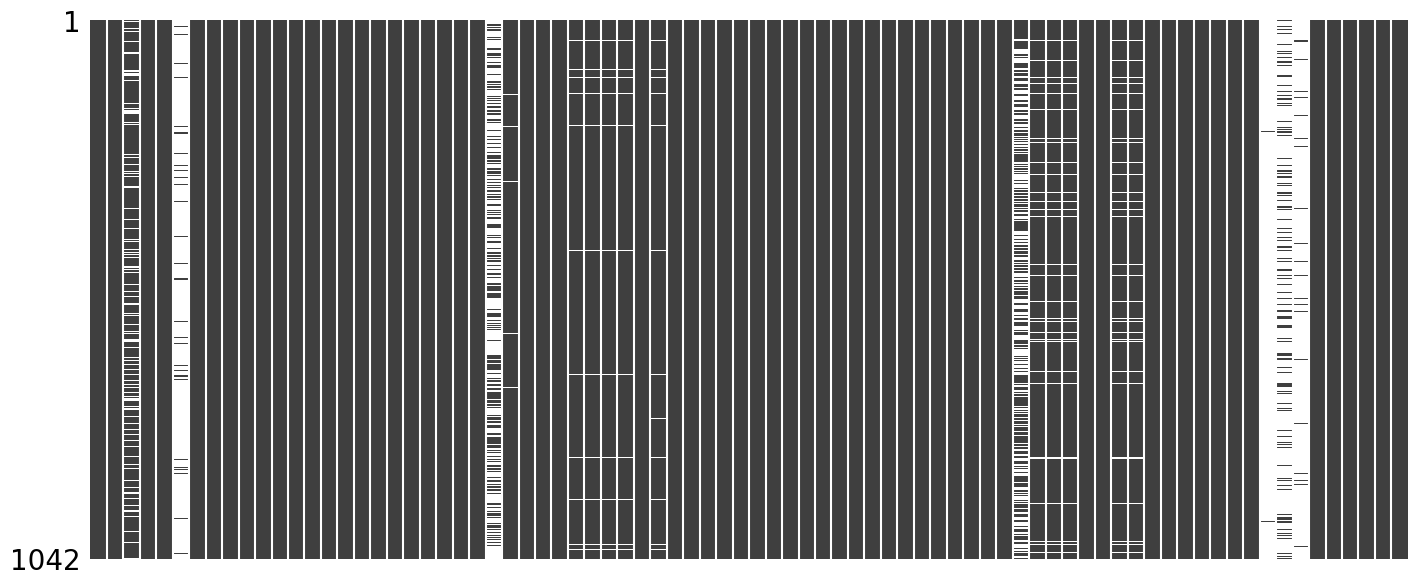

In [25]:
#Train datasındaki eksik verileri matrix olarak gösterelim;
fig, ax = plt.subplots(figsize=(17, 7))

msno.matrix(train_df, ax = ax);

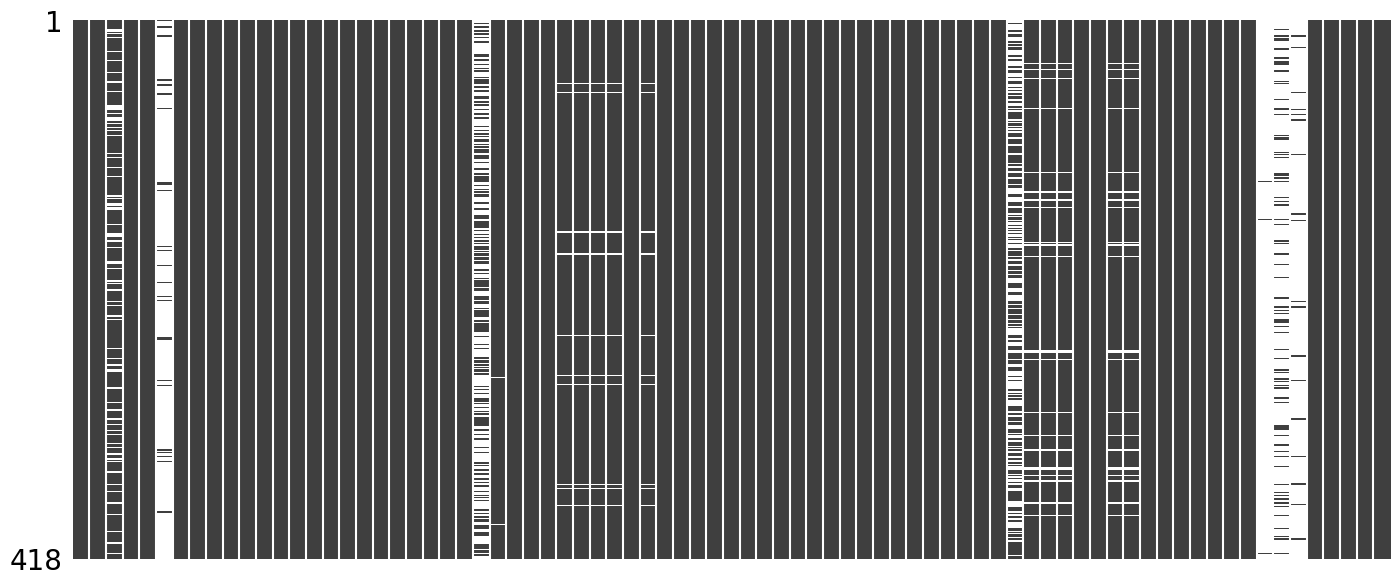

In [26]:
#Test datasındaki eksik verileri matrix olarak gösterelim;
fig, ax = plt.subplots(figsize=(17, 7))

msno.matrix(test_df, ax = ax);

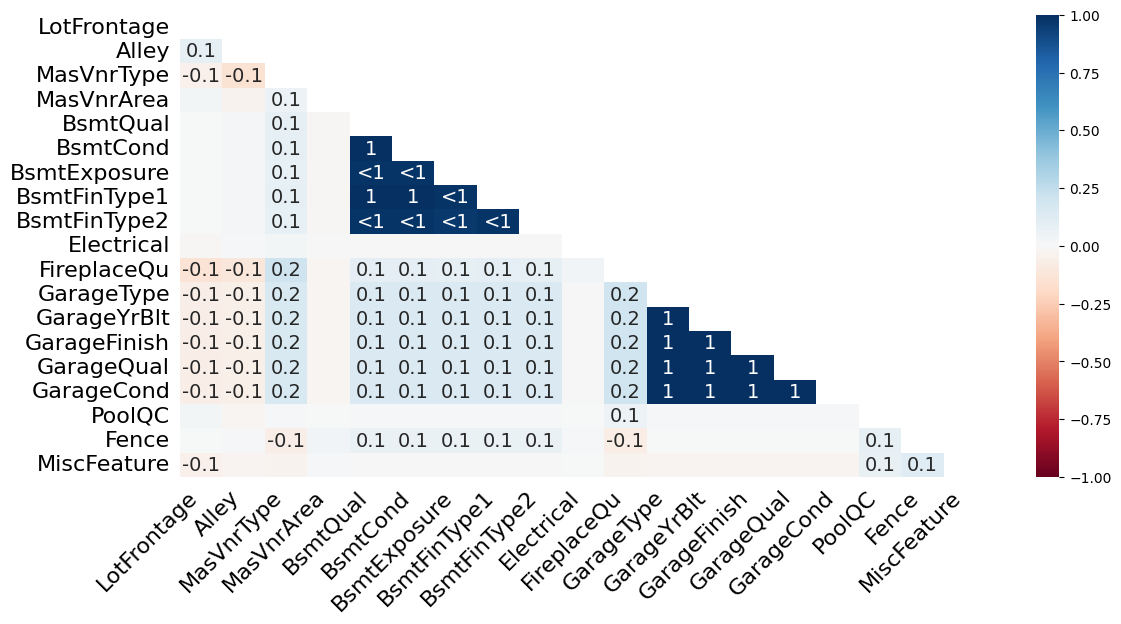

In [27]:
#Train datasındaki eksik veriler arasındaki ilişkiyi heatmap olarak gösterelim;
fig, ax = plt.subplots(figsize=(13, 6))

msno.heatmap(train_df, ax = ax);

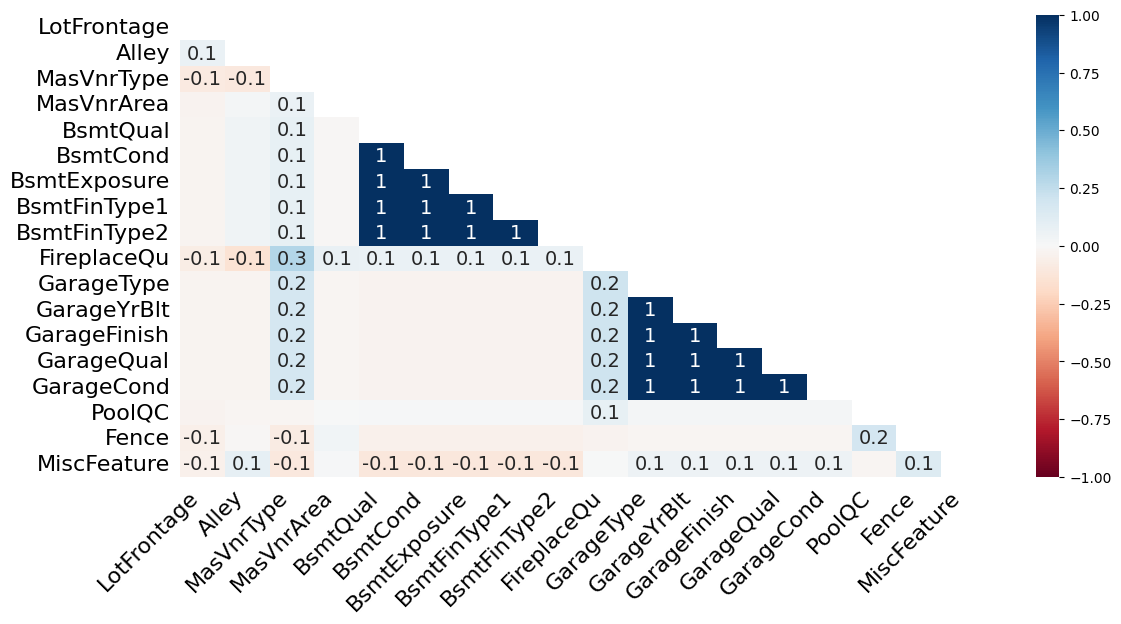

In [28]:
#Test datasındaki eksik veriler arasındaki ilişkiyi heatmap olarak gösterelim;
fig, ax = plt.subplots(figsize=(13, 6))

msno.heatmap(test_df, ax = ax);

In [29]:
# Train datası içinde eksik değer barındıran değişkenleri yazdıralım ve bu değişkenlere gerekli atamaları yapalım.
train_df[sadece_null_sutunlar_train_liste].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,0.0,TA,TA,No,BLQ,Unf,SBrkr,TA,Detchd,1981.0,Unf,TA,TA,NaN,MnPrv,NaN
1,112.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,1995.0,Unf,TA,TA,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,Gd,TA,Gd,Unf,Unf,SBrkr,Gd,BuiltIn,2003.0,Fin,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,TA,No,Unf,Unf,FuseA,NaN,Detchd,1980.0,RFn,TA,TA,NaN,NaN,NaN
4,41.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,Gd,BuiltIn,2004.0,Fin,TA,TA,NaN,NaN,NaN


In [30]:
# Test datası içinde eksik değer barındıran değişkenleri yazdıralım ve bu değişkenlere gerekli atamaları yapalım.
test_df[sadece_null_sutunlar_test_liste].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,30.0,Pave,NaN,0.0,Gd,TA,No,Unf,Unf,NaN,Detchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
1,70.0,NaN,NaN,0.0,TA,TA,Gd,LwQ,Rec,NaN,Detchd,1990.0,Unf,TA,TA,NaN,NaN,NaN
2,90.0,NaN,Stone,215.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2002.0,Fin,TA,TA,NaN,NaN,NaN
3,71.0,NaN,NaN,0.0,TA,TA,No,BLQ,Rec,NaN,Detchd,1962.0,Unf,TA,TA,NaN,NaN,NaN
4,89.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,NaN,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN


In [31]:
df_names = [train_df, test_df]

In [32]:
#LotFrontage değişkenin mülke bağlanan caddenin uzunluğunu ifade ettiğinden ve mean ile median'ının birbirine çok yakın olduğundan, bu değişkendeki Null değerleri mean'i ile doldurduk.

for feature in df_names:
    
    feature['LotFrontage'].fillna(feature['LotFrontage'].mean(), inplace=True)

In [33]:
#Alley değişkenindeki Null değerler 'No alley access'i temsil ettiğinden bu kateforik değişkenin Null değerlerini No Alley değeri ile dolduruyoruz.

for feature in df_names:
    
    feature['Alley'].replace(np.nan, 'No Alley', inplace=True)

In [34]:
# MasVnrArea değişkeninde Null olan 8 satır MasVnrType değişkeninde de Null'dur, bu sebeplen kaplama türü yok diye işaretleyip Null değerleri 0 ile replace ediyoruz.

for feature in df_names:
    
    feature['MasVnrArea'].fillna(0, inplace=True)   

In [35]:
# MasVnrType ev içi döşeme yapısını gösteriyor, herhangi bir döşeme türü yoksa, 'No Veneer' olarak Null değerleri dolduruyoruz

for feature in df_names:
    
    feature['MasVnrType'].replace(np.nan, 'No Veneer', inplace=True)  

In [36]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 değişkenlerinde Null olan değerler Evlerde Bodrum (Basement) olmadığını ifade eder, Null olan değerler 'No Basement' ile doldurulacaktır.

basement_liste = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for basement in basement_liste:

    train_df[basement].replace(np.nan, 'No Basement', inplace=True)
    test_df[basement].replace(np.nan, 'No Basement', inplace=True)

In [37]:
# Electrical değişkeninde sadece bir gözlem birimi Null değerdir, bundan dolayı bu Null değeri değişkenin mode ile dolduruyoruz. Electrical sadece train'de null'dır.

train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

In [38]:
# FireplaceQu değişkeni Fireplaces sayısına bağlı bir değişken olduğu için Fireplaces sayısı 0 olanlar FireplaceQu'da 'No Fireplace' ile geçmektedir. Bundan dolayı FireplaceQu değişkenindeki Null değerleri 'No Fireplace' olarak değiştiriyoruz.

for feature in df_names:
    
    feature['FireplaceQu'].replace(np.nan, 'No Fireplace', inplace=True)

In [39]:
#GarageType, GarageFinish, GarageQual, GarageCond değişkenlerinde bulunan Null değerler ilgili evlerde herhangi bir garajın bulunmadığını gösterdiği için bu kakagorik değişkenlerdeki Null değerleri 'No Garage' olarak değiştiriyoruz.

garage_liste = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for garage in garage_liste:

    train_df[garage].replace(np.nan, 'No Garage', inplace=True)
    test_df[garage].replace(np.nan, 'No Garage', inplace=True)    

In [40]:
# GarageYrBlt değişkeni garajın yapıldığı yılı göstermektedir, garaj olmayan evlerdeki GarageYrBlt değerleri Null olduğundan, bu değerleri 0 ile dolduruyoruz.

for feature in df_names:
    
    feature['GarageYrBlt'].fillna(0, inplace=True)

In [41]:
# PoolQC değişkeninde Null değerler ilgili evlerde havuz olmadığını belirttiği için bu kategorilk değişkendeki Nul değerleri de 'No Pool' değeri ie dolduruyoruz.

for feature in df_names:
    
    feature['PoolQC'].fillna('No Pool', inplace=True)

In [42]:
# Fence değişkeninde Null değerler ilgili evlerde Çit olmadığını belirttiği için bu kategorilk değişkendeki Nul değerleri de 'No Fence' değeri ie dolduruyoruz.

for feature in df_names:
    
    feature['Fence'].fillna('No Fence', inplace=True)


In [43]:
# MiscFeature değişkeninde Null değerler ilgili evlerde ek özellik olmadığını belirttiği için bu kategorilk değişkendeki Nul değerleri de 'No Feature' değeri ie dolduruyoruz.

for feature in df_names:
    
    feature['MiscFeature'].fillna('No Feature', inplace=True)


In [44]:
#veri setimizdeki tüm Null değerler dolduruldu.

print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [45]:
#Sayısal değişkenlerimizi görelim
numerical_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [46]:
## Sayısal veriler iki ana türe ayrılır, Sürekli ve Kesikli Değişkenler, şimdi kesikli değişkenleri ayıralım

discrete_features=[feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in year_feature]
print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 13


In [47]:
discrete_features

['LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [48]:
train_df[discrete_features].head()

,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal
0,0,1,0,2,0,4,1,7,2,2,0,0,0
1,0,0,0,1,1,3,1,6,0,2,0,0,0
2,0,0,0,2,1,3,1,7,1,2,0,0,0
3,0,0,0,1,0,2,1,6,0,2,0,0,0
4,0,0,0,2,1,4,1,8,1,2,0,0,0


In [49]:
# LowQualFinSF değişkeni bir metre kare alan değeri olduğu için onu kesikli alandan kaldırıp, sürekli değişkenler kısmına atmamız gerek, kesikliden kaldırınca otomatik olarak sürekliler arasına gitmiş olacak.

discrete_features.remove('LowQualFinSF')

In [50]:
#Aynı şekilde MiscVal 'de Sürekli değişkenler arasına gönderiyoruz, çünkü dolar cinsinden bir şeyin fiyatını ifade ediyor.

discrete_features.remove('MiscVal')


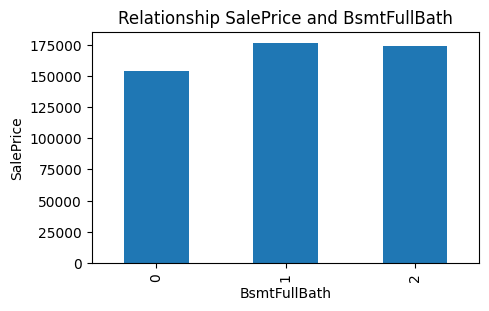

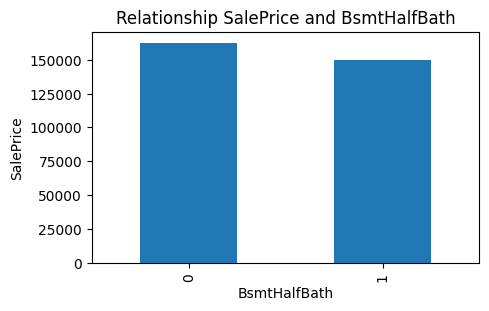

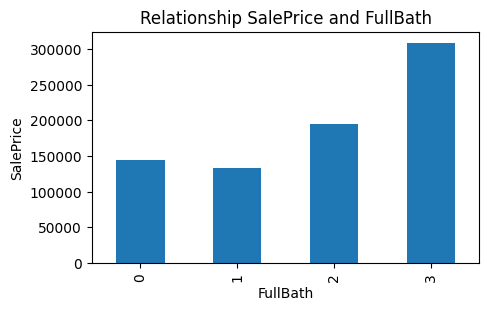

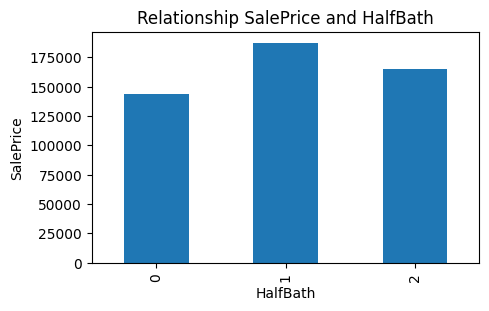

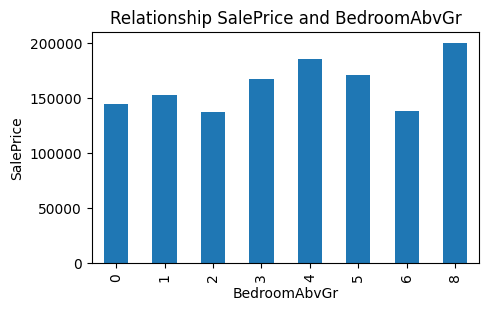

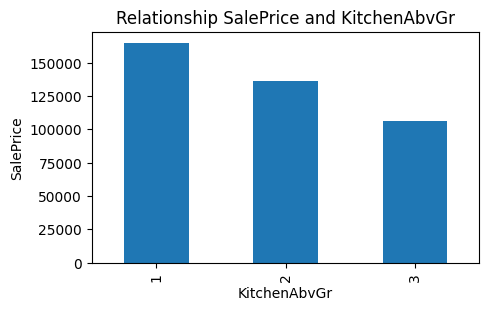

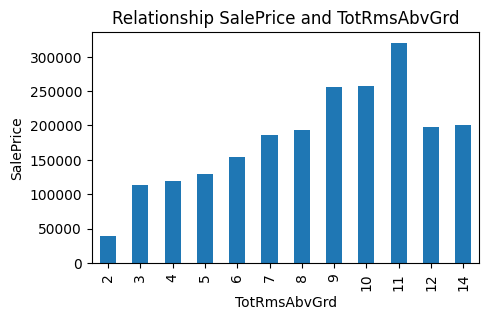

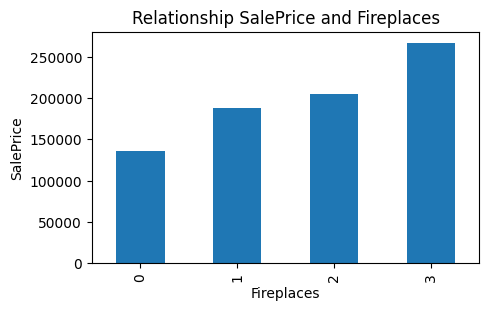

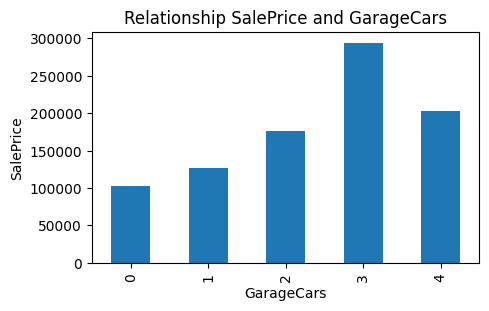

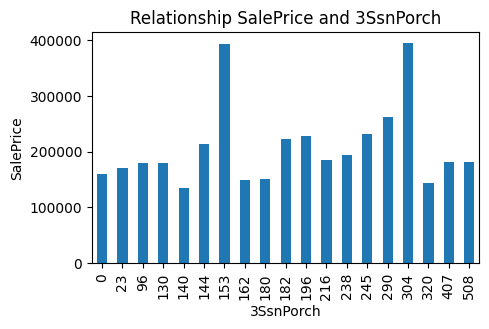

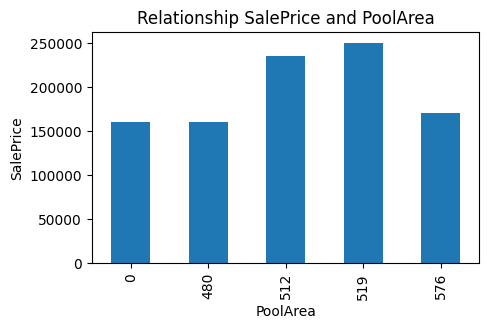

In [51]:
# Şimdi Kesikli değişkenlerin SalePrice ile aralarındaki ilişkiyi bakalım

for feature in discrete_features:
    plt.figure(figsize=(5,3))
    data=train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('Relationship SalePrice and ' + feature)
    plt.show()

In [52]:
#Şimdi de Sürekli değişkenleri ayıralım

continuous_feature=[feature for feature in numerical_features if feature not in discrete_features + year_feature]
print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 18


In [53]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [54]:
train_df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,65.000000,7804,0.0,622,0,500,1122,1328,653,0,1981,576,431,44,0,0,0,135000
1,112.000000,10859,0.0,0,0,1097,1097,1097,0,0,1097,672,392,64,0,0,0,145000
2,69.830607,12394,0.0,0,0,847,847,847,886,0,1733,433,100,48,0,0,0,225000
3,60.000000,7500,0.0,0,0,698,698,698,430,0,1128,528,30,0,164,0,0,68400
4,41.000000,12393,0.0,0,0,847,847,847,1101,0,1948,434,100,48,0,0,0,195000


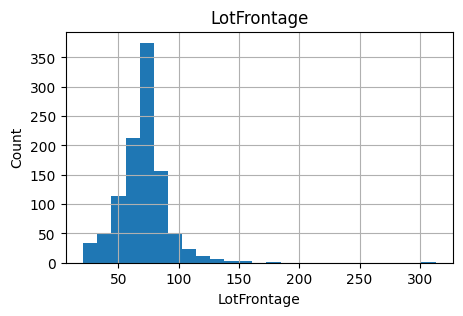

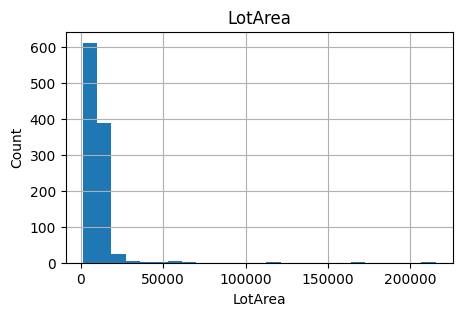

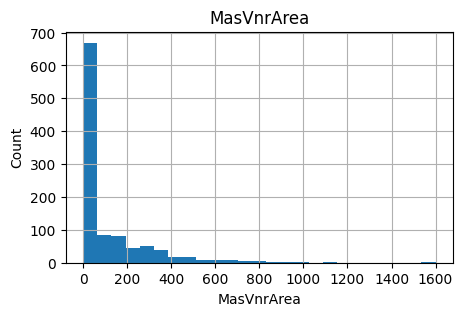

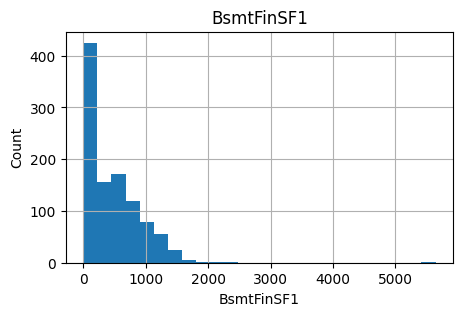

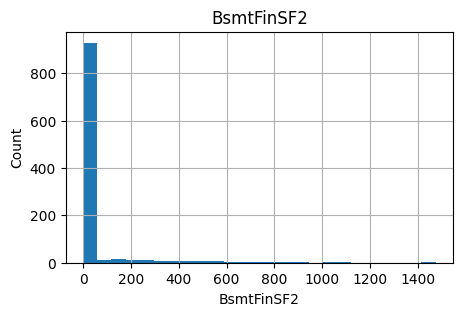

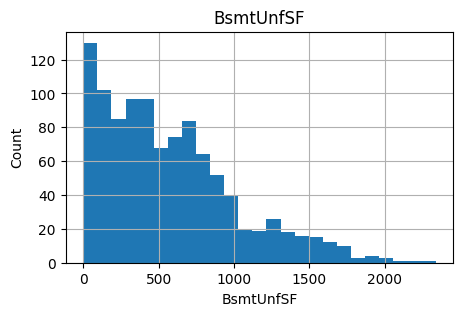

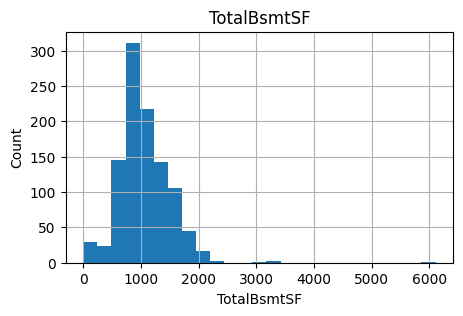

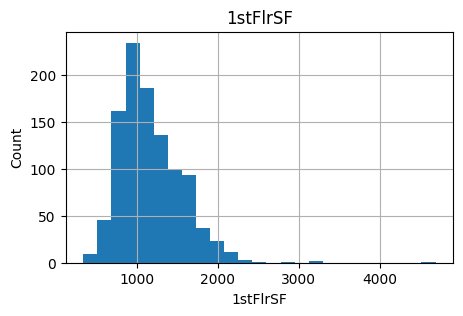

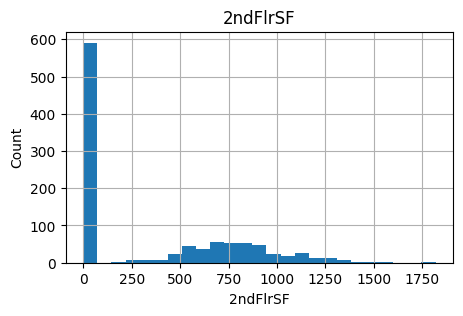

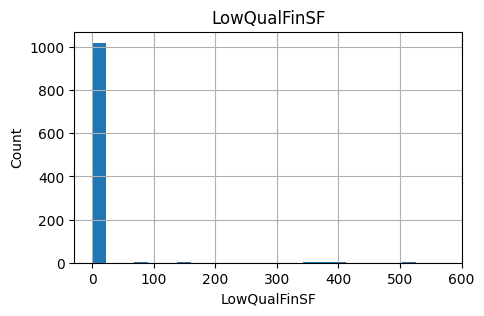

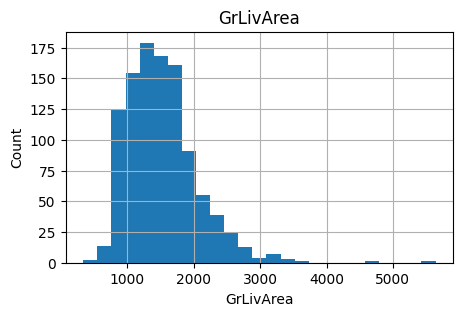

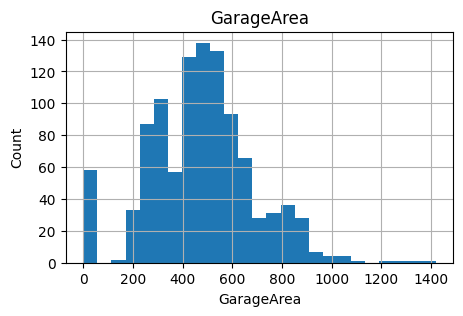

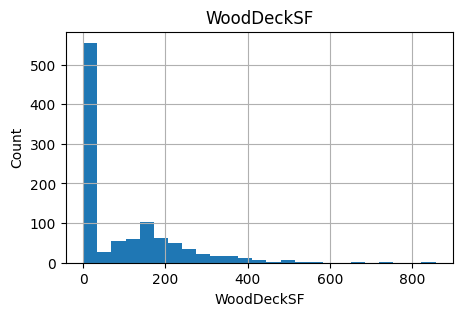

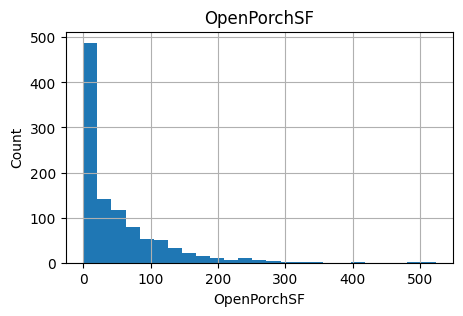

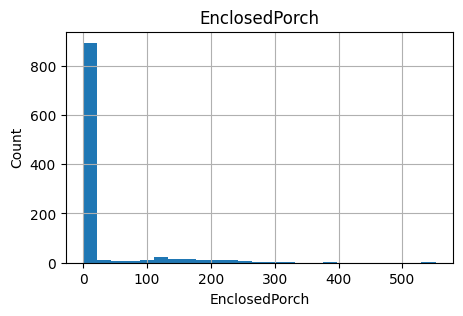

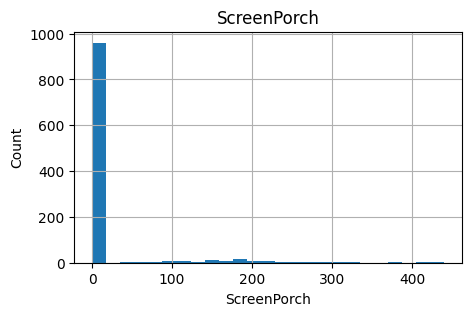

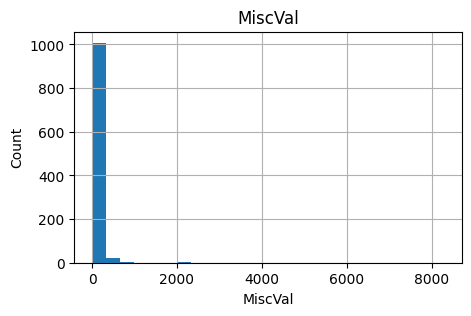

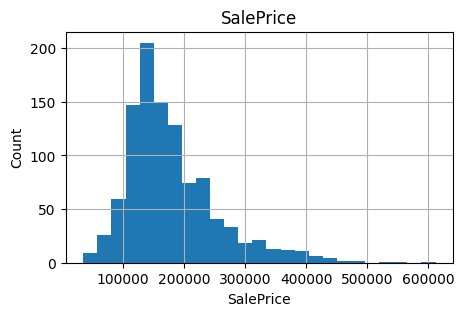

In [55]:
# Dağılımı (Çarpıklık, basıklık, normallik) anlamak için histogramlar oluşturarak sürekli değerleri analiz edelim

for feature in continuous_feature:
    plt.figure(figsize=(5,3))
    data=train_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

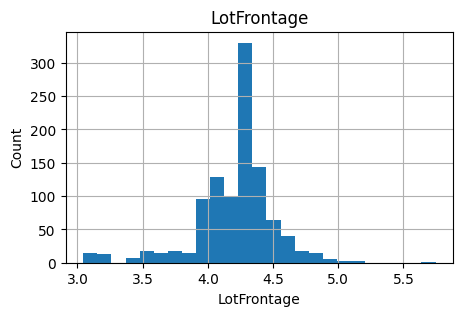

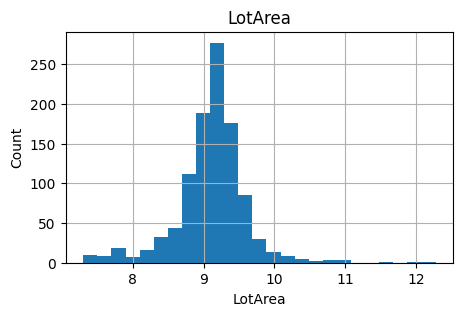

passed!
passed!
passed!
passed!
passed!


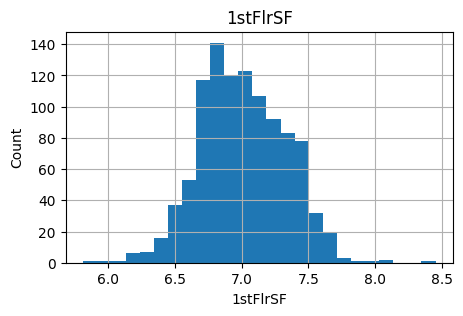

passed!
passed!


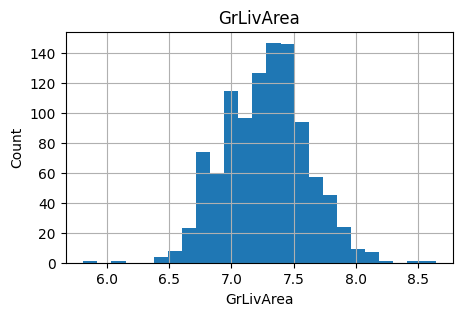

passed!
passed!
passed!
passed!
passed!
passed!


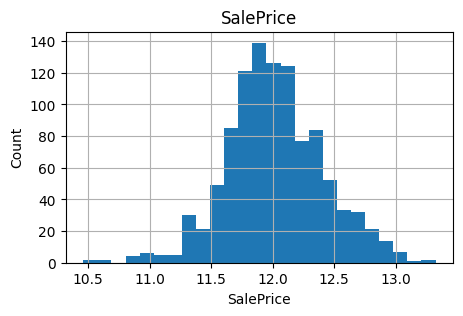

In [56]:
# Sayısal değişkenler çarpık (pozitif çarpık) olduğundan log'a göre dağılımını gerçekleştirelim

for feature in continuous_feature:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
        print("passed!")
    else:
        plt.figure(figsize=(5,3))
        data[feature]=np.log(data[feature])
        # data['SalePrice']=np.log(data['SalePrice'])
        # plt.scatter(data[feature],data['SalePrice'])
        # plt.xlabel(feature)
        # plt.ylabel('SalesPrice')
        # plt.title(feature)
        # plt.show()
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

<Figure size 1500x1500 with 0 Axes>

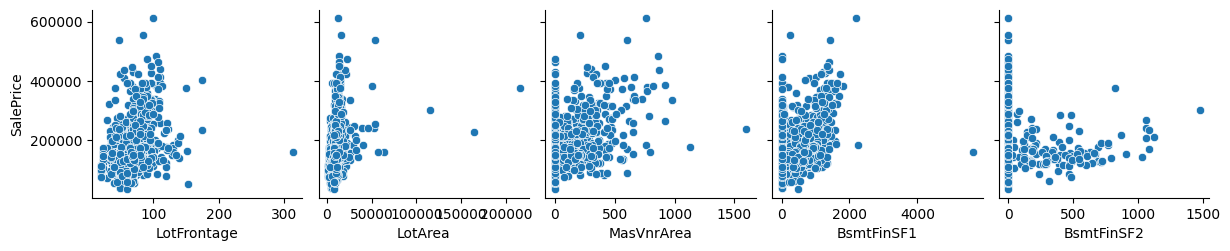

<Figure size 1500x1500 with 0 Axes>

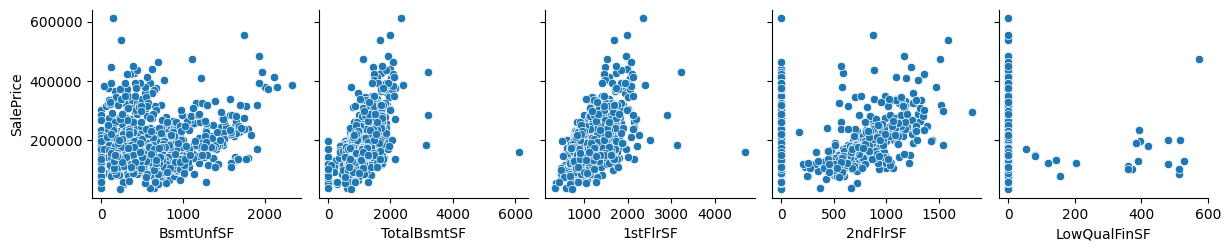

<Figure size 1500x1500 with 0 Axes>

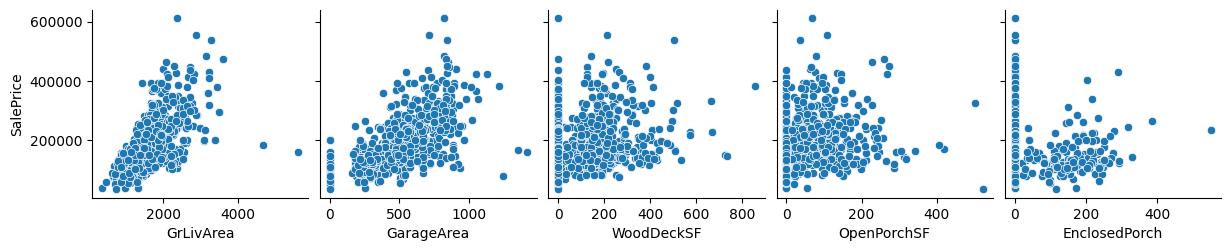

<Figure size 1500x1500 with 0 Axes>

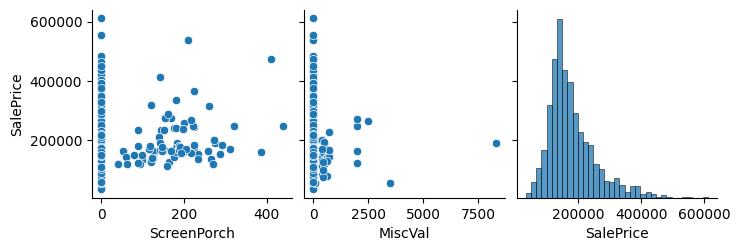

In [57]:
# Sayısal Sürekli değişkenlerin hedef değişkeni olan SalePrice ile olan aralarındaki ilişkiye scatter plot ile bakalım

# Figure ve Axes oluşturun
for i in range(0, len(train_df[continuous_feature].columns), 5):
    plt.figure(figsize=(15,15))

    # İlgili scatter plot'u oluşturun
    scatter_plot = sns.pairplot(data=train_df[continuous_feature], x_vars=train_df[continuous_feature].columns[i:i+5], y_vars=['SalePrice'])

    # Regresyon çizgisini ekleyin
    # for ax in scatter_plot.axes.flat:
    #     ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    # Grafiği göster
    plt.show()


<Figure size 1500x1500 with 0 Axes>

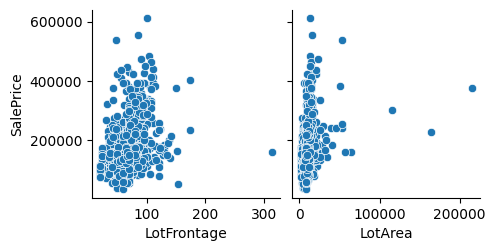

<Figure size 1500x1500 with 0 Axes>

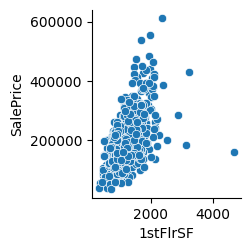

<Figure size 1500x1500 with 0 Axes>

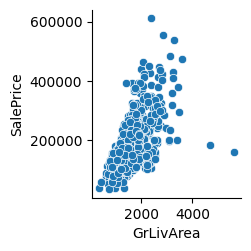

<Figure size 1500x1500 with 0 Axes>

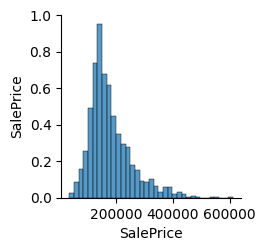

In [58]:
# Sayısal Sürekli değişkenlerin uniqu değerinde Sıfır olmayan değerlerin hedef değişkeni SalePrice ile olan ilişkilerine scatter plot ile bakalım

# Figure ve Axes oluşturun
for i in range(0, len(train_df[continuous_feature].columns), 5):
    plt.figure(figsize=(15, 15))

    # Uniqu değerlerinde Sıfır değerine sahip olan değişkenleri eleyelim
    non_zero_columns = [col for col in train_df[continuous_feature].columns[i:i+5] if train_df[col].unique().all() != 0]

    # Eğer non_zero_columns boş değilse, scatter plot'u oluşturun
    if non_zero_columns:
        # İlgili scatter plot'u oluşturun
        scatter_plot = sns.pairplot(data=train_df[continuous_feature], x_vars=non_zero_columns, y_vars=['SalePrice'])

        # Regresyon çizgisini ekleyin
        # for ax in scatter_plot.axes.flat:
        #     ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

        # Grafiği göster
        plt.show()
    else:
        pass


In [59]:
# Outliers değerlere göz atalım Sürekli sayısal değişkenler için
train_df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,65.000000,7804,0.0,622,0,500,1122,1328,653,0,1981,576,431,44,0,0,0,135000
1,112.000000,10859,0.0,0,0,1097,1097,1097,0,0,1097,672,392,64,0,0,0,145000
2,69.830607,12394,0.0,0,0,847,847,847,886,0,1733,433,100,48,0,0,0,225000
3,60.000000,7500,0.0,0,0,698,698,698,430,0,1128,528,30,0,164,0,0,68400
4,41.000000,12393,0.0,0,0,847,847,847,1101,0,1948,434,100,48,0,0,0,195000


In [60]:
# Sürekli sayısal değişkenlerin merkezi dağılım ölçüleri
train_df[continuous_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1042.0,69.830607,20.856272,21.0,60.0,69.830607,79.00,313.0
LotArea,1042.0,10525.710173,10259.314731,1477.0,7500.0,9417.500000,11612.00,215245.0
MasVnrArea,1042.0,98.439539,174.502891,0.0,0.0,0.000000,149.00,1600.0
BsmtFinSF1,1042.0,442.607486,466.154941,0.0,0.0,370.500000,712.00,5644.0
BsmtFinSF2,1042.0,45.240883,159.642861,0.0,0.0,0.000000,0.00,1474.0
BsmtUnfSF,1042.0,570.377159,447.391574,0.0,216.5,480.500000,808.00,2336.0
TotalBsmtSF,1042.0,1058.225528,447.484456,0.0,793.0,990.500000,1308.25,6110.0
1stFlrSF,1042.0,1166.541267,392.654002,334.0,882.0,1088.000000,1392.00,4692.0
2ndFlrSF,1042.0,348.208253,434.518042,0.0,0.0,0.000000,728.00,1818.0
LowQualFinSF,1042.0,7.211132,54.626068,0.0,0.0,0.000000,0.00,572.0


In [61]:

# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in continuous_feature:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    lower_limit_train = train_df[column].quantile(0.25)
    upper_limit_train = train_df[column].quantile(0.75)

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    train_df[column] = train_df[column].apply(lambda x: lower_limit_train if x < lower_limit_train else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    train_df[column] = train_df[column].apply(lambda x: upper_limit_train if x > upper_limit_train else x)

# Sonuçları göster
train_df[continuous_feature].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,65.000000,7804.0,0.0,622.0,0.0,500.0,1122.0,1328.0,653.0,0.0,1786.0,576.0,168.0,44.0,0.0,0.0,0.0,135000.0
1,79.000000,10859.0,0.0,0.0,0.0,808.0,1097.0,1097.0,0.0,0.0,1128.0,576.0,168.0,64.0,0.0,0.0,0.0,145000.0
2,69.830607,11612.0,0.0,0.0,0.0,808.0,847.0,882.0,728.0,0.0,1733.0,433.0,100.0,48.0,0.0,0.0,0.0,214375.0
3,60.000000,7500.0,0.0,0.0,0.0,698.0,793.0,882.0,430.0,0.0,1128.0,528.0,30.0,0.0,0.0,0.0,0.0,129600.0
4,60.000000,11612.0,0.0,0.0,0.0,808.0,847.0,882.0,728.0,0.0,1786.0,434.0,100.0,48.0,0.0,0.0,0.0,195000.0


In [62]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [63]:
# Aynısını test datası için de uygulayalım. Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü

# continuous_feature listesini kopyala
continuous_feature_2 = continuous_feature.copy()

# 'SalePrice' sütununu çıkar
continuous_feature_2.remove('SalePrice')

# Geri kalan sürekli özellikler üzerinde işlem yap
for column in continuous_feature_2:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    lower_limit_test = test_df[column].quantile(0.25)
    upper_limit_test = test_df[column].quantile(0.75)

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    test_df[column] = test_df[column].apply(lambda x: lower_limit_test if x < lower_limit_test else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    test_df[column] = test_df[column].apply(lambda x: upper_limit_test if x > upper_limit_test else x)

# Sonuçları göster
test_df[continuous_feature_2].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,60.0,7685.75,0.00,0.0,0.0,600.00,803.25,874.50,600.00,0.0,1200.0,480.0,0.00,64.75,0.0,0.0,0.0
1,70.0,8400.00,0.00,187.0,0.0,244.75,814.00,913.00,0.00,0.0,1144.0,360.0,0.00,0.00,0.0,0.0,0.0
2,78.0,11248.00,186.75,712.5,0.0,567.00,1263.25,1375.25,0.00,0.0,1668.0,576.0,171.75,45.00,0.0,0.0,0.0
3,71.0,9204.00,0.00,25.0,0.0,247.00,1144.00,1144.00,0.00,0.0,1144.0,360.0,0.00,64.75,0.0,0.0,0.0
4,78.0,11542.75,0.00,0.0,0.0,807.75,860.00,874.50,728.75,0.0,1720.0,565.0,0.00,64.75,0.0,0.0,0.0


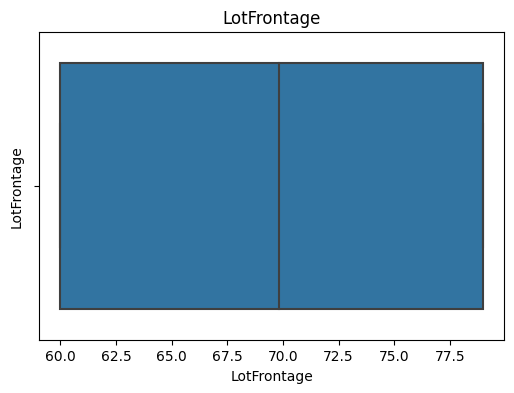

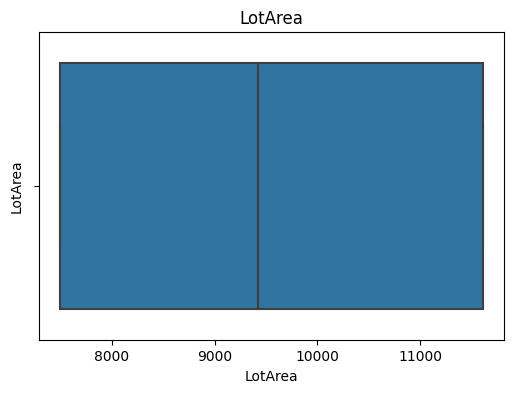

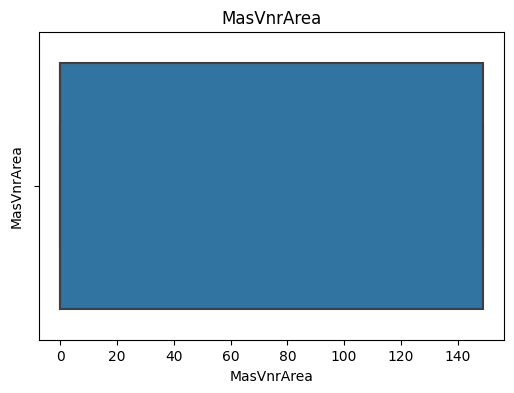

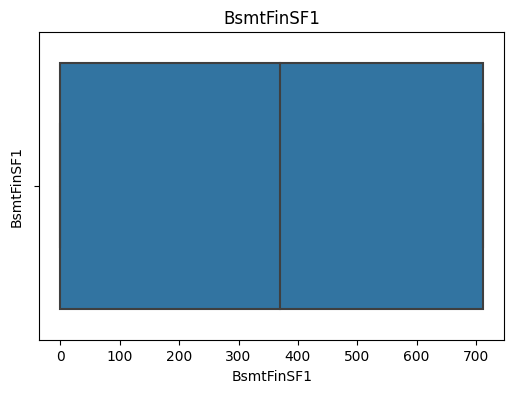

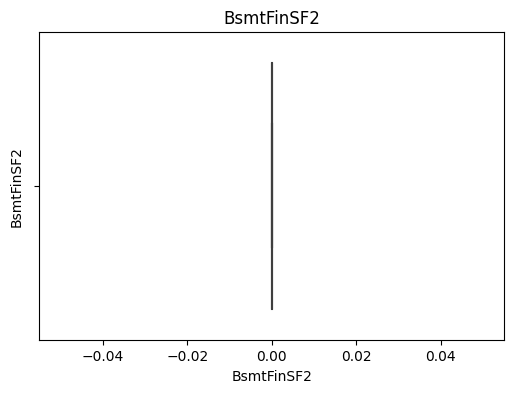

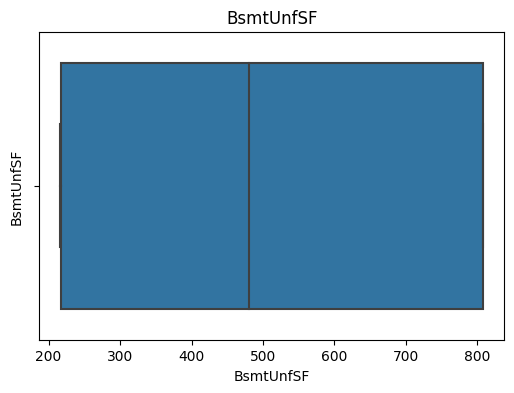

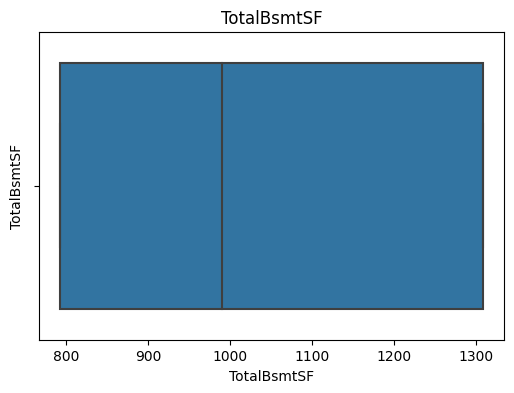

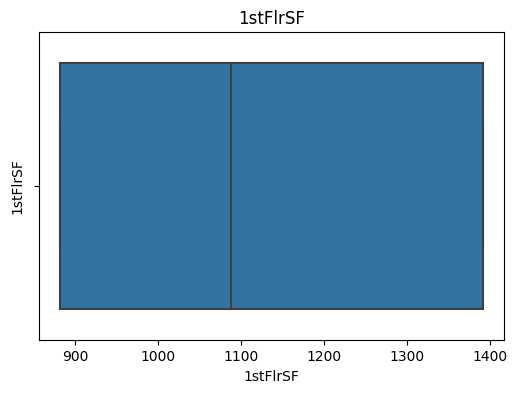

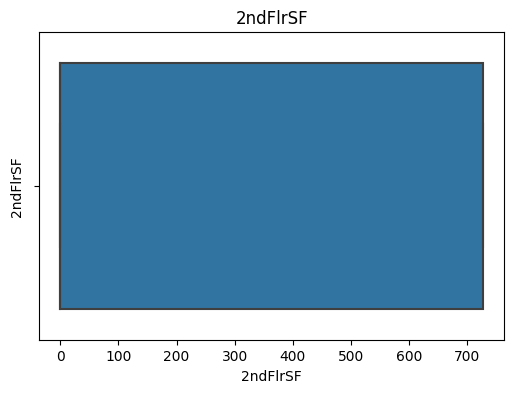

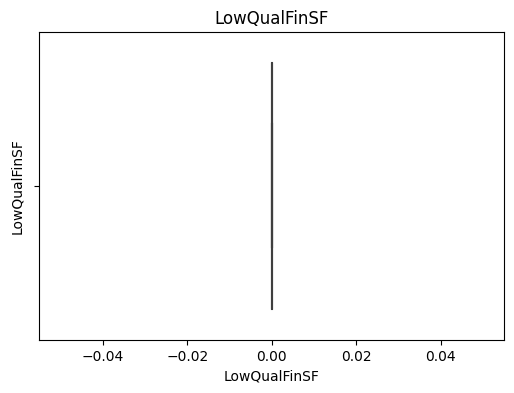

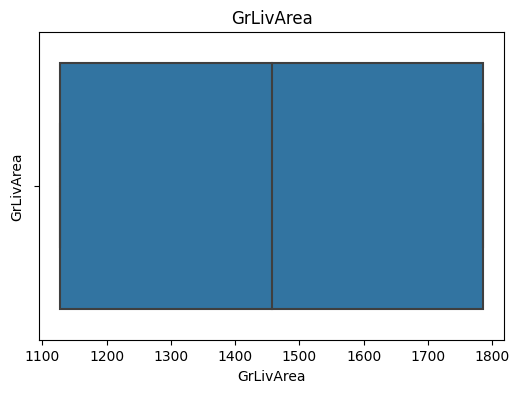

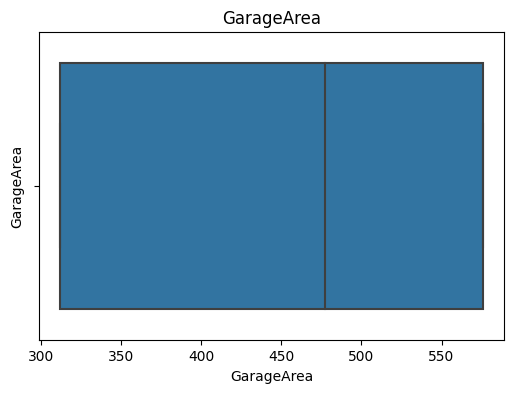

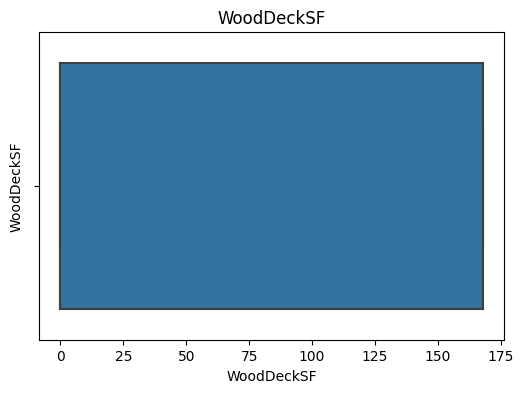

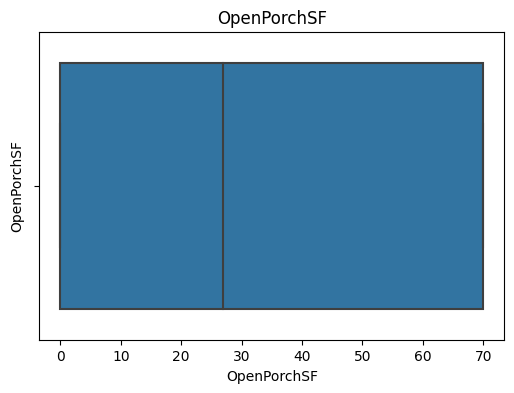

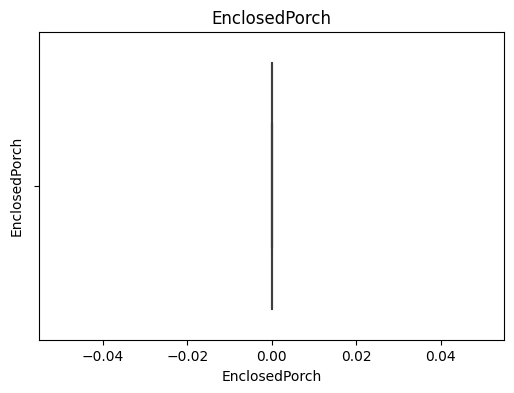

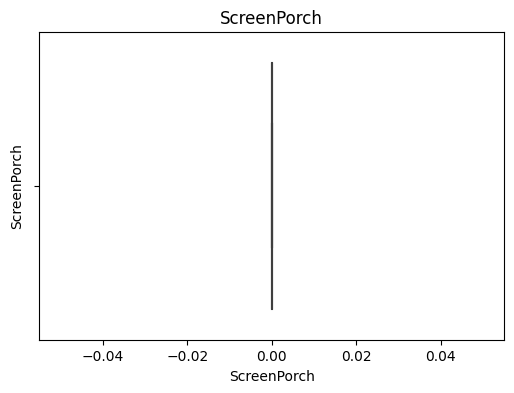

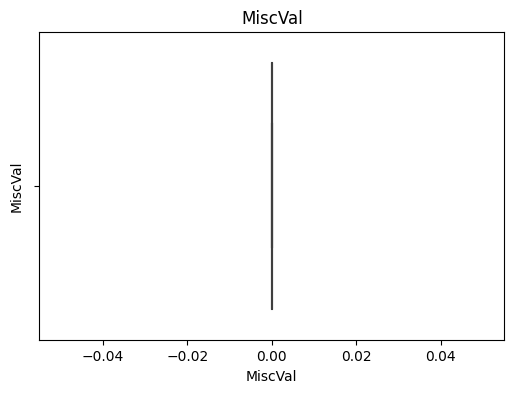

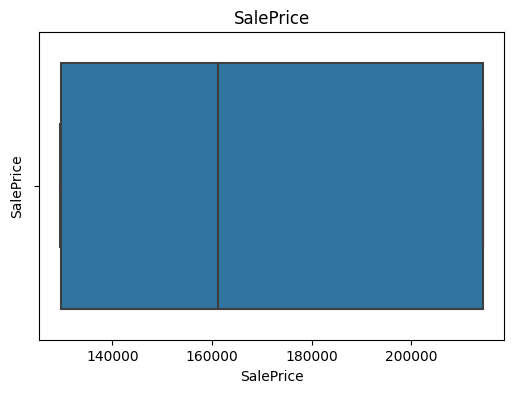

In [64]:
#Outliers
for feature in train_df[continuous_feature]:
    plt.figure(figsize=(6, 4))
    data=train_df[continuous_feature].copy()
    # if 0 in data[feature].unique():
    #     pass
    # else:
    # data[feature]=np.log(data[feature])
    sns.boxplot(x=feature, data=data)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show();

In [65]:
#Şimdi Kategorik değişkenlere Encoding uygulamak için kategorik değişkenleri kendi içlerinde Nominal ve Ordinal olacak şekilde iki ayrı listeye ayırıp uygun Encoding işlemine tabi tutalım.

train_df[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,50,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,Gable,CompShg,WdShing,Plywood,No Veneer,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,No Pool,MnPrv,No Feature,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,No Veneer,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,No Veneer,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,No Pool,No Fence,No Feature,WD,Family
3,50,C (all),Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,Gable,CompShg,MetalSd,MetalSd,No Veneer,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,No Fireplace,Detchd,RFn,TA,TA,Y,No Pool,No Fence,No Feature,COD,Abnorml
4,60,RL,Pave,No Alley,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,No Veneer,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal


In [66]:
nominal_features = [feature for feature in categorical_features if feature in ['MSZoning', 'Street', 'Alley',
                                                                               'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                                                                               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                                                               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                                                               'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
                                                                               'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']]
nominal_features

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [67]:
# Ordinal değişkenler kendi içinde bir sıralama ifade ettiğinden, onları Label Encoder kullanarak Encoding yapabiliriz.

ordinal_features = [feature for feature in categorical_features if feature in ['LotShape', 'LandSlope', 'ExterQual',
                                                                               'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                                                               'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                                                                               'GarageQual', 'GarageCond', 'PoolQC', 'Fence']]

In [68]:
#ordinal kategorik değişkenler için mapping mantığı ile sıralama düzeyine göre düşükten yükseğe bir sıkala izleyerek numerik bir sıralama yapıyoruz.

# 1 ile 5 arası değer alanlar
category_dict_1= {'ExterQual','ExterCond','HeatingQC','KitchenQual'}

# 0 ile 5 arası değer alanlar
category_dict_2 = {'BsmtQual','BsmtCond'}

# 0 ile 6 arası değer alanlar
category_dict_3 = {'BsmtFinType1','BsmtFinType2'}

# 0 ile 4 arası değer alanlar
category_dict_4 = {'BsmtExposure'}

# 1 ile 3 arası
category_dict_5 = {'PavedDrive'}

# 0 ile 4 arası değer alanlar
category_dict_6 = {'Fence'}

# 0 ile 4 arası değer alanlar
category_dict_7 = {'PoolQC'}

# 1 ile 4 arası değer alanlar
category_dict_8= {'LotShape'}

# 1 ile 4 arası değer alanlar
category_dict_9 = {'LandContour'}

# 1 ile 4 arası değer alanlar
category_dict_10 = {'Utilities'}

# 1 ile 3 arası değer alanlar
category_dict_11 = {'LandSlope'}

# 0 ile 3 arası değer alanlar
category_dict_12 = {'GarageFinish'}

# 0 ile 5 arası değer alanlar
category_dict_14 = {'FireplaceQu'}

# 0 ile 5 arası değer alanlar
category_dict_15 = {'GarageQual','GarageCond'}

category_dict_16 = {'Functional'}


# belirsiz düzeni olanlar
category_dict_14_nominals = {'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'CentralAir', 'Alley',
                  'Condition2', 'GarageType','SaleCondition','SaleType','Electrical' , 'Street',
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature'}

In [69]:
#Train datasına ordinal encoding uygulayalım

for col in train_df:
    if col in category_dict_1:
        train_df[col].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_2:
        train_df[col].replace({'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_3:
         train_df[col].replace({'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    elif col in category_dict_4:
         train_df[col].replace({'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
    elif col in category_dict_5:
         train_df[col].replace({'N':1, 'P':2, 'Y':3}, inplace=True)
    elif col in category_dict_6:
         train_df[col].replace({'No Fence':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)
    elif col in category_dict_7:
         train_df[col].replace({'No Pool':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}, inplace=True)
    elif col in category_dict_8:
         train_df[col].replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)
    elif col in category_dict_9:
         train_df[col].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
    elif col in category_dict_10:
         train_df[col].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
    elif col in category_dict_11:
         train_df[col].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
    elif col in category_dict_12:
         train_df[col].replace({'No Garage':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
    elif col in category_dict_14:
        train_df[col].replace({'No Fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_15:
        train_df[col].replace({'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_16:
        train_df[col].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6}, inplace=True)


In [70]:
#Test datasınali aynı sütunlara da ordinal encoding uygulayalım

for col in test_df:
    if col in category_dict_1:
        test_df[col].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_2:
        test_df[col].replace({'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_3:
         test_df[col].replace({'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    elif col in category_dict_4:
         test_df[col].replace({'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
    elif col in category_dict_5:
         test_df[col].replace({'N':1, 'P':2, 'Y':3}, inplace=True)
    elif col in category_dict_6:
         test_df[col].replace({'No Fence':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)
    elif col in category_dict_7:
         test_df[col].replace({'No Pool':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}, inplace=True)
    elif col in category_dict_8:
         test_df[col].replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)
    elif col in category_dict_9:
         test_df[col].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
    elif col in category_dict_10:
         test_df[col].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
    elif col in category_dict_11:
         test_df[col].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
    elif col in category_dict_12:
         test_df[col].replace({'No Garage':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
    elif col in category_dict_14:
        test_df[col].replace({'No Fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_15:
        test_df[col].replace({'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    elif col in category_dict_16:
        test_df[col].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6}, inplace=True)

In [71]:
train_df[ordinal_features].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,4,3,3,3,3,3,1,3,4,3,3,1,3,3,0,3
1,4,3,3,3,4,3,1,5,3,0,0,1,3,3,0,0
2,3,3,4,3,4,3,4,5,4,0,4,3,3,3,0,0
3,4,3,3,4,3,3,1,3,3,0,0,2,3,3,0,0
4,2,3,4,3,4,3,1,5,4,0,4,3,3,3,0,0


In [72]:
test_df[ordinal_features].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,4,3,4,3,4,3,1,5,4,0,0,2,3,3,0,0
1,4,3,3,3,3,3,4,4,3,0,0,1,3,3,0,0
2,3,3,4,3,4,3,3,5,4,0,3,3,3,3,0,0
3,4,3,3,3,3,3,1,3,3,0,0,1,3,3,0,0
4,3,3,4,3,4,3,1,5,4,0,0,2,3,3,0,0


In [73]:
#Her bir nominal kategorik değişken için Encoding yapmak için ilgili değişkende geçme sıklığına göre atama yapıyoruz. Bunu yapmamızın sebebi, ev verisinde fiyatın bir şeyin olup olmamasına göre şekillenmesinden dolayı geçiş sıklıklarının önemli bir rol oynamasıdır.
train_df[nominal_features].head()

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,4,4,Inside,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,No Veneer,BrkTil,GasA,Y,SBrkr,Detchd,3,No Feature,WD,Normal
1,RL,Pave,No Alley,4,4,Corner,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,No Veneer,PConc,GasA,Y,SBrkr,Attchd,3,No Feature,WD,Normal
2,RL,Pave,No Alley,4,4,Corner,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Veneer,PConc,GasA,Y,SBrkr,BuiltIn,3,No Feature,WD,Family
3,C (all),Pave,No Alley,4,4,Inside,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,No Veneer,CBlock,GasA,Y,FuseA,Detchd,3,No Feature,COD,Abnorml
4,RL,Pave,No Alley,4,4,FR2,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Veneer,PConc,GasA,Y,SBrkr,BuiltIn,3,No Feature,WD,Normal


In [74]:
test_df[nominal_features].head()

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,FV,Pave,Pave,4,4,Inside,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,No Veneer,PConc,GasA,Y,SBrkr,Detchd,3,No Feature,WD,Normal
1,RL,Pave,No Alley,4,4,Inside,Sawyer,Norm,Norm,1Fam,SFoyer,Gable,CompShg,VinylSd,VinylSd,No Veneer,CBlock,GasA,Y,SBrkr,Detchd,3,No Feature,WD,Normal
2,RL,Pave,No Alley,4,4,Corner,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,Y,SBrkr,Attchd,3,No Feature,WD,Normal
3,RL,Pave,No Alley,4,4,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,No Veneer,CBlock,GasA,Y,SBrkr,Detchd,3,No Feature,COD,Normal
4,RL,Pave,No Alley,4,4,Corner,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Veneer,PConc,GasA,Y,SBrkr,Attchd,3,No Feature,WD,Normal


In [75]:
#Geçme sıklıklarına göre nominal kategorik değişkenlere Encoding işlemi;

# Her bir kategorik nominal değişken için frekans hesaplama ve güncelleme
for column in train_df[nominal_features]:
    value_counts = train_df[column].value_counts()
    train_df[column] = train_df[column].map(value_counts)

# Sonuçları göster
train_df[nominal_features].head()


,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,817,1038,976,937,1041,747,19,892,1031,875,111,811,1025,23,113,643,110,1017,966,938,284,951,1007,900,847
1,817,1038,976,937,1041,191,105,892,1031,875,516,811,1025,362,351,643,460,1017,966,938,606,951,1007,900,847
2,817,1038,976,937,1041,191,57,892,1031,875,313,811,1025,362,351,643,460,1017,966,938,68,951,1007,900,16
3,8,1038,976,937,1041,747,28,892,1031,875,111,811,1025,144,142,643,447,1017,966,78,284,951,1007,34,76
4,817,1038,976,937,1041,35,105,892,1031,875,313,811,1025,362,351,643,460,1017,966,938,68,951,1007,900,847


In [76]:
#Test datası için de geçme sıklıklarına göre nominal kategorik değişkenlere Encoding işlemi;

# Her bir kategorik nominal değişken için frekans hesaplama ve güncelleme
for column in test_df[nominal_features]:
    value_counts = test_df[column].value_counts()
    test_df[column] = test_df[column].map(value_counts)

# Sonuçları göster
test_df[nominal_features].head()

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,22,416,10,374,418,305,26,368,414,36,132,330,409,76,72,229,187,411,399,397,103,389,399,367,351
1,334,416,393,374,418,305,25,368,414,345,11,330,409,153,153,229,187,411,399,397,103,389,399,367,351
2,334,416,393,374,418,72,45,368,414,345,210,78,409,153,153,36,187,411,399,397,264,389,399,367,351
3,334,416,393,374,418,305,63,368,414,345,210,330,409,60,61,229,187,411,399,397,103,389,399,9,351
4,334,416,393,374,418,72,45,368,414,345,132,330,409,153,153,229,187,411,399,397,264,389,399,367,351


In [77]:
#Verimizin dtype'larını kontrol edelim, hepsi sayısal formata çevrilmiş görünüyor;
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1042 non-null   object 
 1   MSZoning       1042 non-null   int64  
 2   LotFrontage    1042 non-null   float64
 3   LotArea        1042 non-null   float64
 4   Street         1042 non-null   int64  
 5   Alley          1042 non-null   int64  
 6   LotShape       1042 non-null   int64  
 7   LandContour    1042 non-null   int64  
 8   Utilities      1042 non-null   int64  
 9   LotConfig      1042 non-null   int64  
 10  LandSlope      1042 non-null   int64  
 11  Neighborhood   1042 non-null   int64  
 12  Condition1     1042 non-null   int64  
 13  Condition2     1042 non-null   int64  
 14  BldgType       1042 non-null   int64  
 15  HouseStyle     1042 non-null   int64  
 16  OverallQual    1042 non-null   object 
 17  OverallCond    1042 non-null   object 
 18  YearBuil

In [78]:
#Türü object görünenleri integer'a çevirelim;

train_df['MSSubClass'] = train_df['MSSubClass'].astype(int)
train_df['OverallQual'] = train_df['OverallQual'].astype(int)
train_df['OverallCond'] = train_df['OverallCond'].astype(int)

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     418 non-null    object 
 1   MSZoning       418 non-null    int64  
 2   LotFrontage    418 non-null    float64
 3   LotArea        418 non-null    float64
 4   Street         418 non-null    int64  
 5   Alley          418 non-null    int64  
 6   LotShape       418 non-null    int64  
 7   LandContour    418 non-null    int64  
 8   Utilities      418 non-null    int64  
 9   LotConfig      418 non-null    int64  
 10  LandSlope      418 non-null    int64  
 11  Neighborhood   418 non-null    int64  
 12  Condition1     418 non-null    int64  
 13  Condition2     418 non-null    int64  
 14  BldgType       418 non-null    int64  
 15  HouseStyle     418 non-null    int64  
 16  OverallQual    418 non-null    object 
 17  OverallCond    418 non-null    object 
 18  YearBuilt 

In [80]:
test_df['MSSubClass'] = test_df['MSSubClass'].astype(int)
test_df['OverallQual'] = test_df['OverallQual'].astype(int)
test_df['OverallCond'] = test_df['OverallCond'].astype(int)

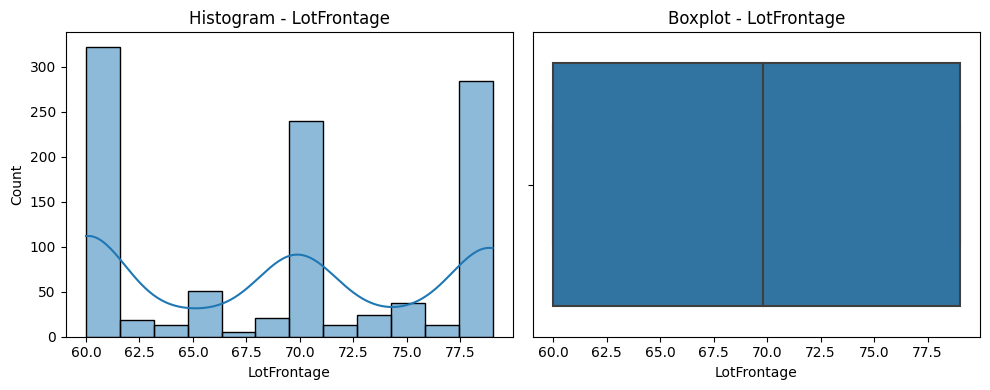

LotFrontage: Çarpıklık (Skewness): 0.03809426453124991, Basıklık (Kurtosis): -1.488718836184719


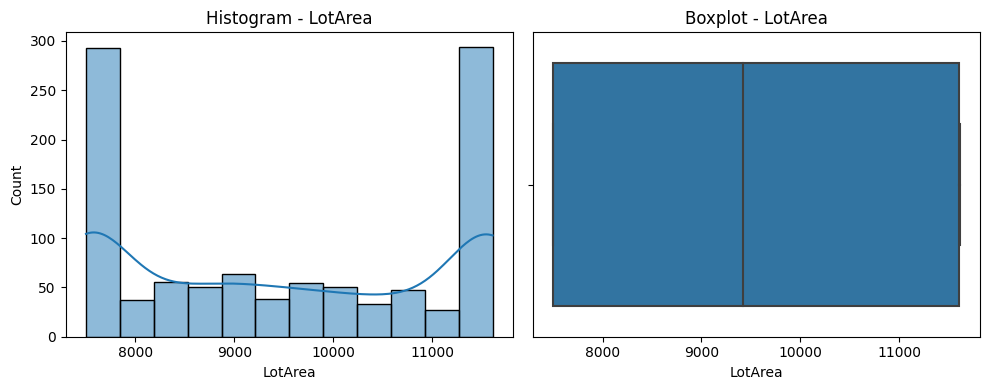

LotArea: Çarpıklık (Skewness): 0.06063525313298167, Basıklık (Kurtosis): -1.5900790904133577


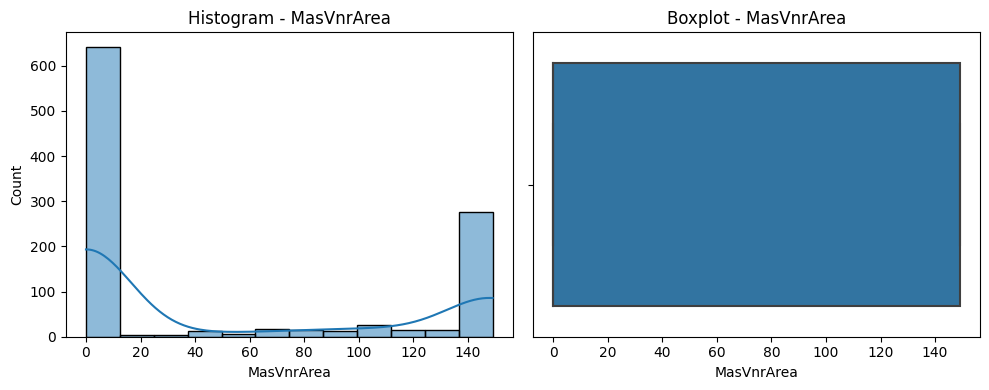

MasVnrArea: Çarpıklık (Skewness): 0.6795144464002316, Basıklık (Kurtosis): -1.42874944674972


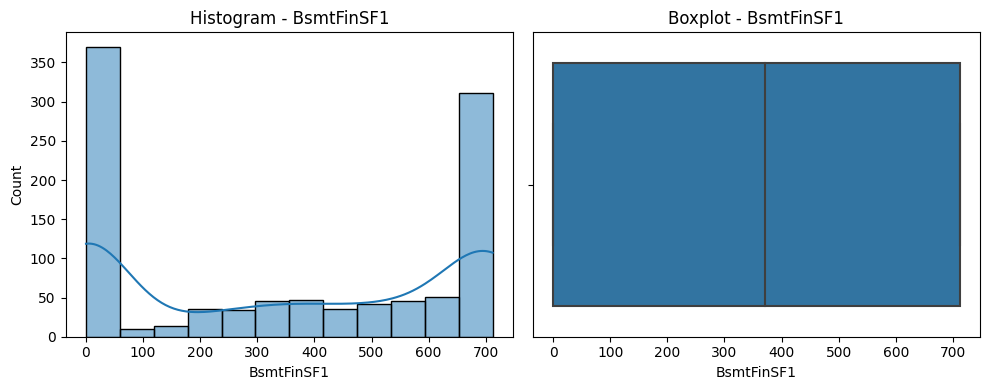

BsmtFinSF1: Çarpıklık (Skewness): -0.029933744755542502, Basıklık (Kurtosis): -1.6999168414899453


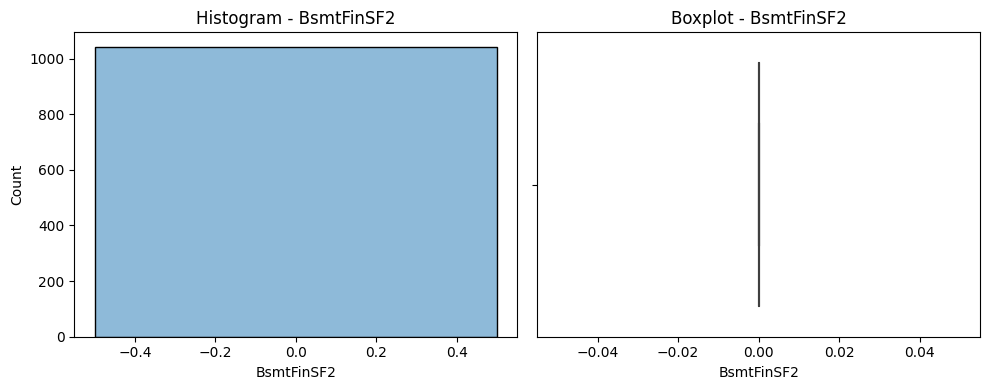

BsmtFinSF2: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


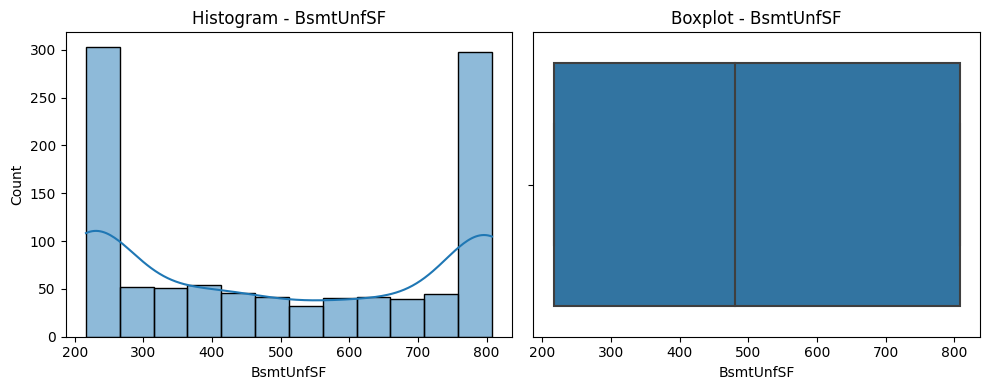

BsmtUnfSF: Çarpıklık (Skewness): 0.06933601706169111, Basıklık (Kurtosis): -1.6559153284061614


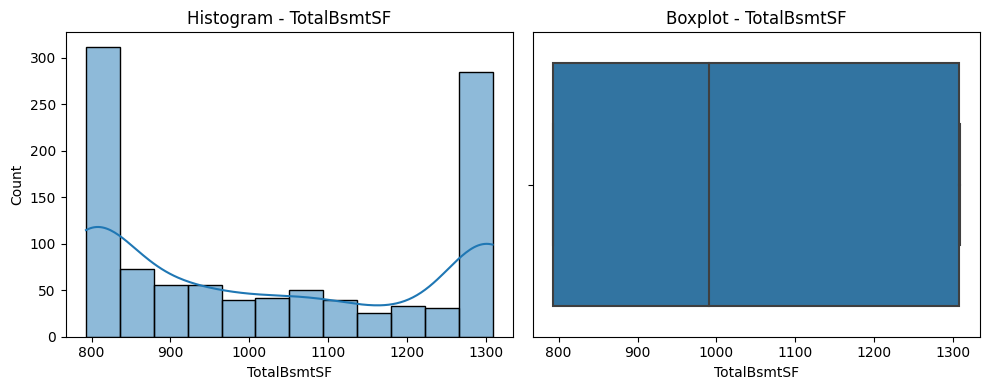

TotalBsmtSF: Çarpıklık (Skewness): 0.21325964260942182, Basıklık (Kurtosis): -1.600247506653049


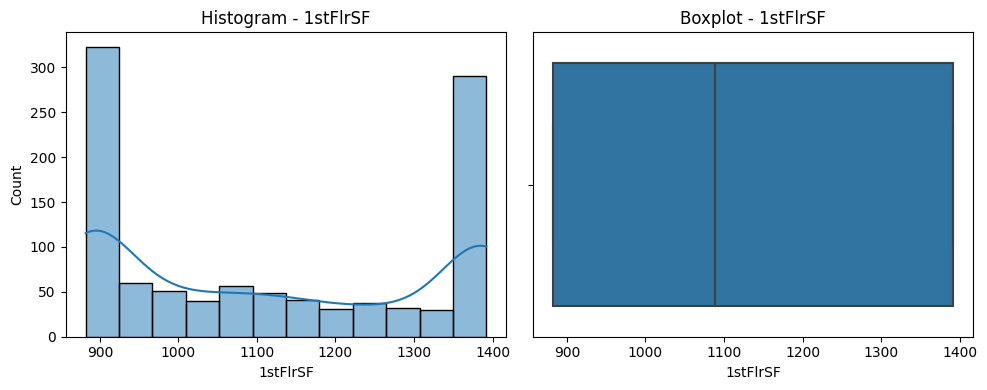

1stFlrSF: Çarpıklık (Skewness): 0.17468576616672574, Basıklık (Kurtosis): -1.6186373321894842


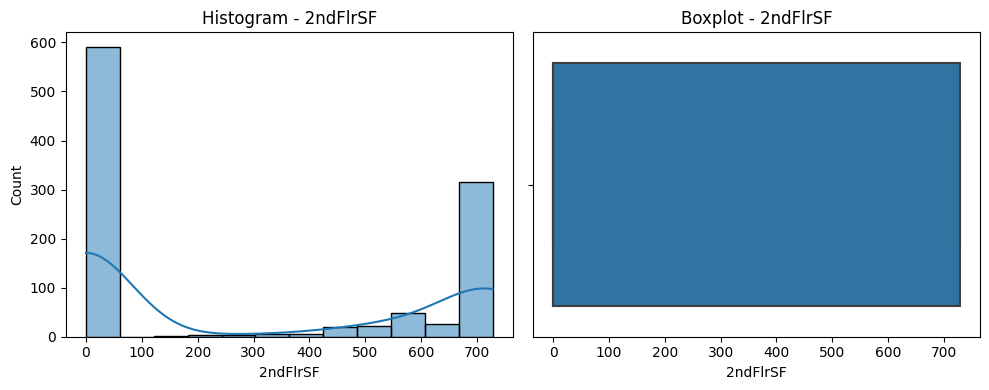

2ndFlrSF: Çarpıklık (Skewness): 0.3814582441691668, Basıklık (Kurtosis): -1.7718460526594142


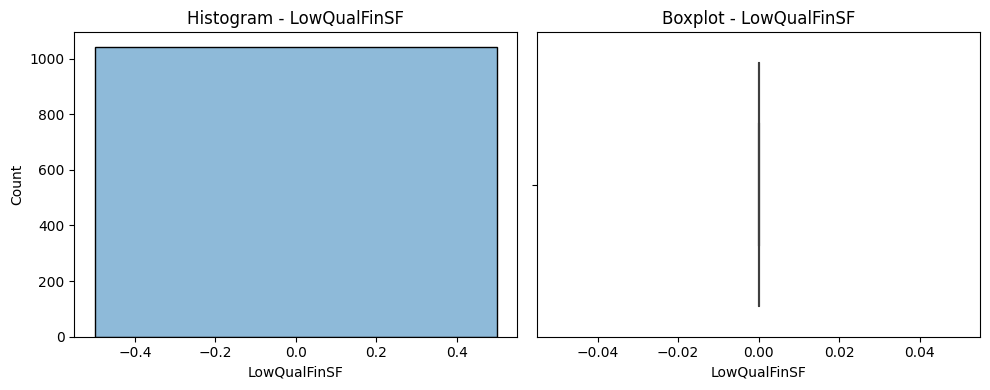

LowQualFinSF: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


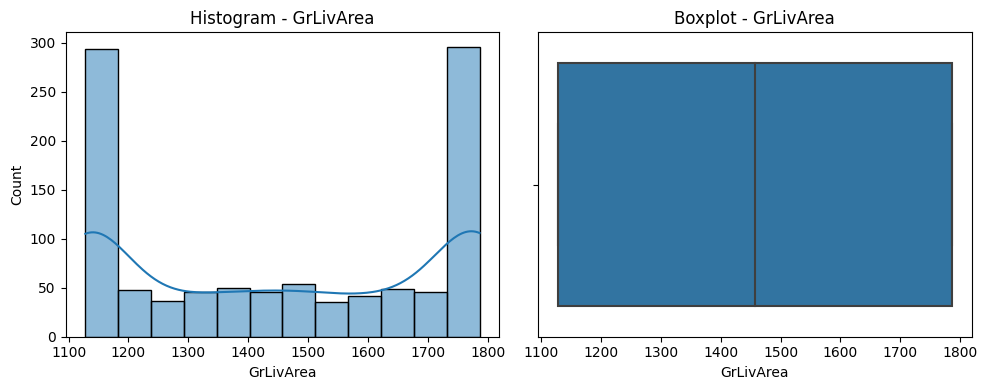

GrLivArea: Çarpıklık (Skewness): -0.008716113915372851, Basıklık (Kurtosis): -1.6289895679761923


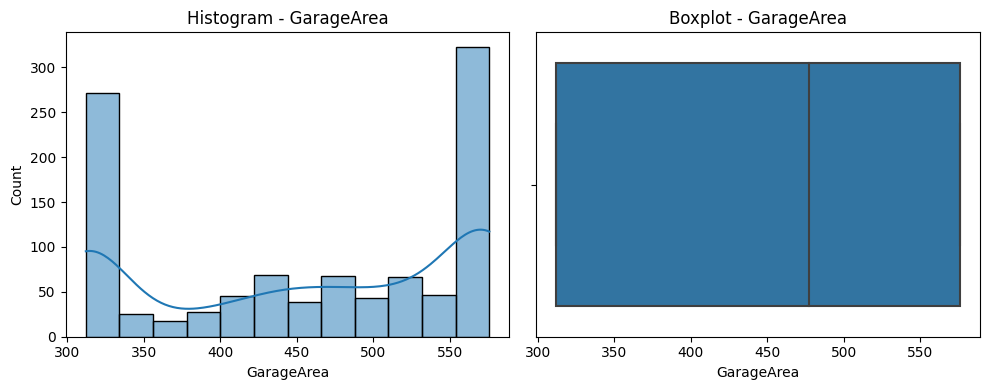

GarageArea: Çarpıklık (Skewness): -0.2600677297628075, Basıklık (Kurtosis): -1.524044102363697


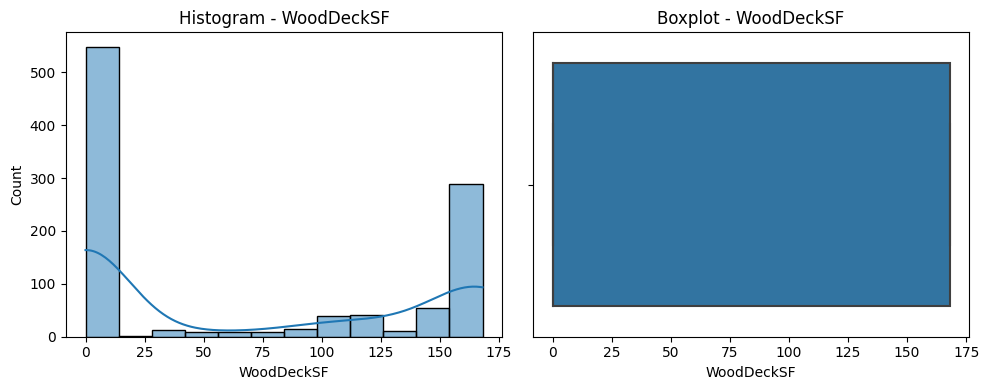

WoodDeckSF: Çarpıklık (Skewness): 0.3441837752960823, Basıklık (Kurtosis): -1.7385642314183063


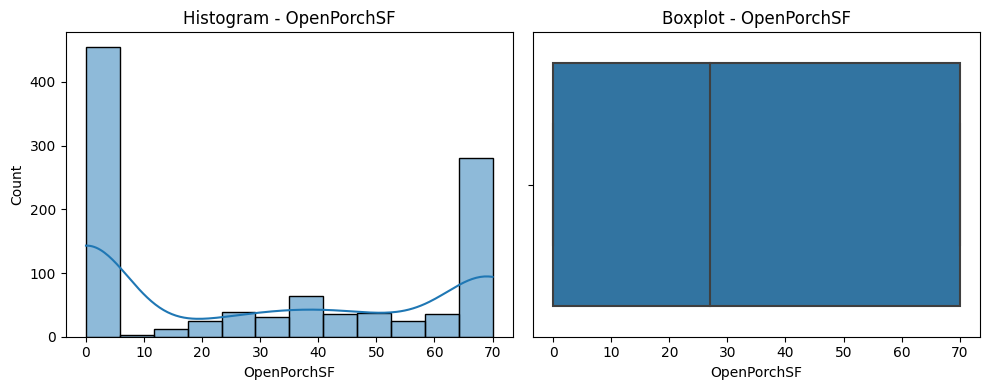

OpenPorchSF: Çarpıklık (Skewness): 0.22525003206657926, Basıklık (Kurtosis): -1.6694138151280018


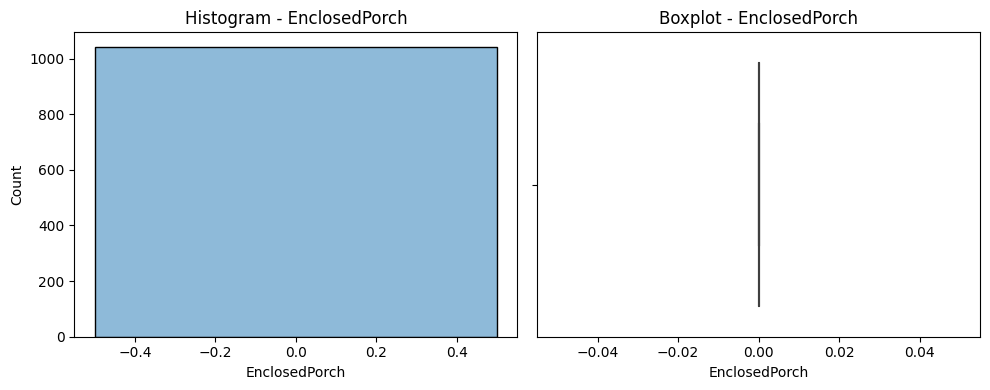

EnclosedPorch: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


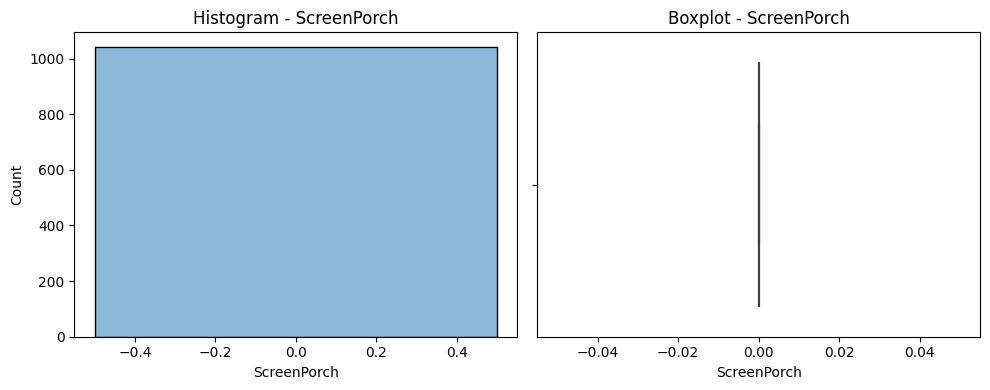

ScreenPorch: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


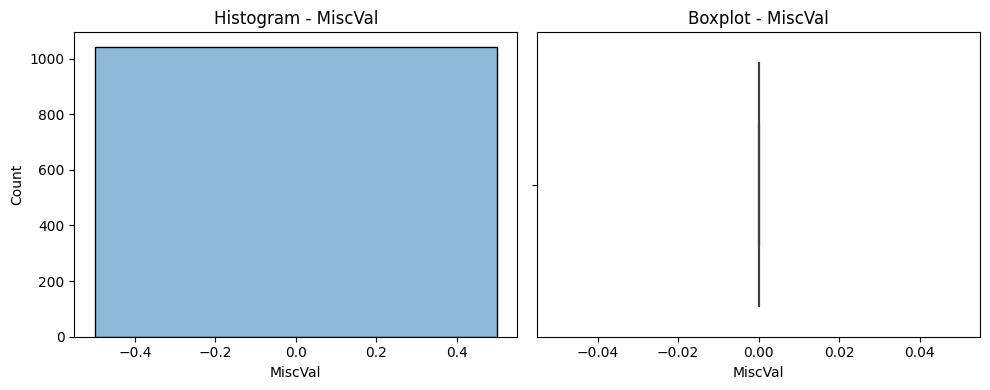

MiscVal: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


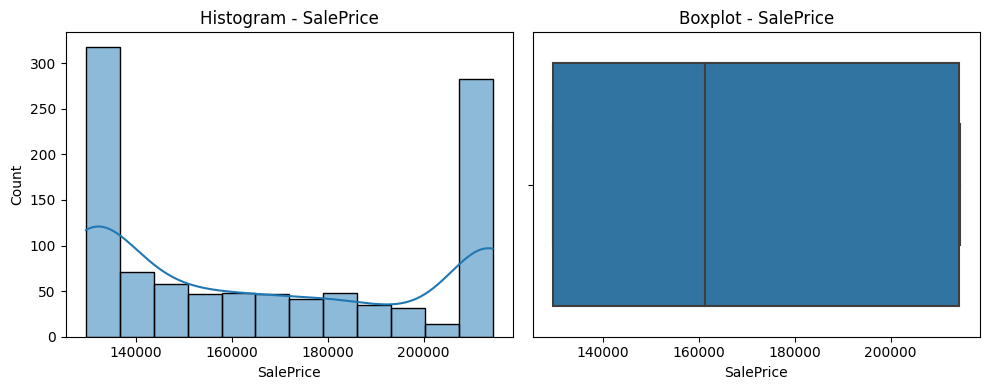

SalePrice: Çarpıklık (Skewness): 0.24294873450291415, Basıklık (Kurtosis): -1.5736809440146982


In [81]:
#Verinin son dağılımına bakalım;
from scipy.stats import skew, kurtosis

# Her sütun için çarpıklık ve basıklık değerlerini görselleştir
for column in train_df[continuous_feature]:
    skewness = skew(train_df[column])
    kurt = kurtosis(train_df[column])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.histplot(train_df[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram - {column}')

    sns.boxplot(x=train_df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot - {column}')

    plt.tight_layout()
    plt.show()

    print(f"{column}: Çarpıklık (Skewness): {skewness}, Basıklık (Kurtosis): {kurt}")


In [82]:
# Ve verimiz makine öğrenmesi modeli içi hazır;

In [83]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,817,65.000000,7804.0,1038,976,4,937,1041,747,3,19,892,1031,875,111,4,3,1928,1950,811,1025,23,113,643,0.0,3,3,110,3,3,1,4,622.0,1,0.0,500.0,1122.0,1017,3,966,938,1328.0,653.0,0.0,1786.0,1,0,2,0,4,1,4,7,3,2,3,284,1981.0,1,2,576.0,3,3,951,168.0,44.0,0.0,0,0.0,0,0,3,1007,0.0,12,2009,900,847,135000.0
1,20,817,79.000000,10859.0,1038,976,4,937,1041,191,3,105,892,1031,875,516,5,5,1994,1995,811,1025,362,351,643,0.0,3,3,460,4,3,1,1,0.0,1,0.0,808.0,1097.0,1017,5,966,938,1097.0,0.0,0.0,1128.0,0,0,1,1,3,1,3,6,0,0,0,606,1995.0,1,2,576.0,3,3,951,168.0,64.0,0.0,0,0.0,0,0,0,1007,0.0,6,2009,900,847,145000.0
2,60,817,69.830607,11612.0,1038,976,3,937,1041,191,3,57,892,1031,875,313,7,5,2003,2003,811,1025,362,351,643,0.0,4,3,460,4,3,4,1,0.0,1,0.0,808.0,847.0,1017,5,966,938,882.0,728.0,0.0,1733.0,0,0,2,1,3,1,4,7,0,1,4,68,2003.0,3,2,433.0,3,3,951,100.0,48.0,0.0,0,0.0,0,0,0,1007,0.0,10,2007,900,16,214375.0
3,50,8,60.000000,7500.0,1038,976,4,937,1041,747,3,28,892,1031,875,111,4,4,1920,1950,811,1025,144,142,643,0.0,3,4,447,3,3,1,1,0.0,1,0.0,698.0,793.0,1017,3,966,78,882.0,430.0,0.0,1128.0,0,0,1,0,2,1,3,6,0,0,0,284,1980.0,2,2,528.0,3,3,951,30.0,0.0,0.0,0,0.0,0,0,0,1007,0.0,4,2010,34,76,129600.0
4,60,817,60.000000,11612.0,1038,976,2,937,1041,35,3,105,892,1031,875,313,7,5,2004,2005,811,1025,362,351,643,0.0,4,3,460,4,3,1,1,0.0,1,0.0,808.0,847.0,1017,5,966,938,882.0,728.0,0.0,1786.0,0,0,2,1,4,1,4,8,0,1,4,68,2004.0,3,2,434.0,3,3,951,100.0,48.0,0.0,0,0.0,0,0,0,1007,0.0,9,2006,900,847,195000.0


In [84]:
#Train datası için veriyi bağımlı ve bağımsız değişkenlere ayıralım;

X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [85]:
#Train datasını train ve test verilerine bölelim;

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [86]:
#Modelimizi import edip eğitelim;
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 200, max_samples = 0.6, random_state = 123)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [87]:
# Modelin ürettiği çıktılar (y_pred) ile gerçek değerler (y_test) kullanılır.
# Evaluating the model
from sklearn.metrics import r2_score

r2= r2_score(y_test, y_pred)
r2

0.9023256791907501

In [88]:
# Ayarlanmış R Karesi (Adjusted R²)

n = len(y_test)  # Örnek sayısı
p = 4  # Özellik sayısı (bu örnek set için 1dir)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9004104964297844


In [89]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7360.281315789474


In [90]:
# Ortalama Kare Hatası (Mean Squared Error - MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 116716763.74879704


In [91]:
# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
from math import sqrt

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10803.553292727214


In [92]:
test_pred = regressor.predict(test_df)
test_pred

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([163710.79 , 132144.5  , 199124.625, 141394.025, 193495.2  ,
       141889.77 , 137632.75 , 146809.965, 196683.   , 143073.225,
       177778.14 , 198648.375, 166930.22 , 141009.17 , 132320.25 ,
       130950.5  , 197522.125, 199521.5  , 179211.505, 156622.485,
       134448.63 , 140752.015, 163158.1  , 131506.25 , 169426.425,
       136736.485, 196855.12 , 198781.   , 197499.   , 133426.85 ,
       146392.105, 146551.8  , 131484.55 , 132167.5  , 136519.75 ,
       136349.31 , 170681.645, 168455.35 , 130792.92 , 182150.   ,
       163683.74 , 174863.36 , 171463.745, 181291.78 , 197112.95 ,
       130922.5  , 147735.175, 180477.775, 182504.445, 153665.745,
       132785.285, 185854.28 , 193186.03 , 190316.55 , 189559.475,
       180098.375, 136718.93 , 170008.81 , 137123.66 , 196996.5  ,
       176762.21 , 131475.   , 192786.075, 196965.25 , 139251.675,
       195181.625, 197612.125, 163611.77 , 144140.485, 148772.28 ,
       140702.845, 168312.21 , 183812.555, 190047.45 , 158691.

In [93]:
test_pred = pd.DataFrame(test_pred, columns =['SalePrice'])
test_pred.head()

,SalePrice
0,163710.790
1,132144.500
2,199124.625
3,141394.025
4,193495.200


In [94]:
predict_df = pd.concat([test_df_orj['index'], test_pred], axis=1)
predict_df.head()

,index,SalePrice
0,1042,163710.790
1,1043,132144.500
2,1044,199124.625
3,1045,141394.025
4,1046,193495.200


In [95]:
predict_df.tail()

,index,SalePrice
413,1455,172425.325
414,1456,198912.145
415,1457,138327.290
416,1458,187142.300
417,1459,138248.050


In [96]:
predict_df.to_csv('submission.csv', index=False)
predict_df.head()

,index,SalePrice
0,1042,163710.790
1,1043,132144.500
2,1044,199124.625
3,1045,141394.025
4,1046,193495.200
